In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time

import lightgbm

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from matplotlib.pyplot import figure

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

%matplotlib inline

In [2]:
rep_cols = {'ID':'ID', 
 '板温':'board_t', 
 '现场温度':'env_t', 
 '光照强度':'light_strength', 
 '转换效率':'efficiency', 
 '转换效率A':'efficiency_A', 
 '转换效率B':'efficiency_B', 
 '转换效率C':'efficiency_C', 
 '电压A':'V_A',
 '电压B':'V_B', 
 '电压C':'V_C', 
 '电流A':'I_A', 
 '电流B':'I_B', 
 '电流C':'I_C', 
 '功率A':'P_A', 
 '功率B':'P_B', 
 '功率C':'P_C', 
 '平均功率':'P_avg', 
 '风速':'wind_speed',
 '风向':'wind_direction', 
 '发电量':'y'
}

In [3]:
def my_val(preds, train_data):
    label = train_data.get_label()
    return 'score', 1/(1+np.sqrt(mean_squared_error(preds, label))), True
def my_obj(preds, train_data):
    labels = train_deata.get_label()

In [4]:
train = pd.read_csv('../data/public_raw.train.csv')
test = pd.read_csv('../data/public_raw.test.csv')

train_len = train.shape[0]

train['is_train']=1
test['is_train']=0

df = pd.concat([train, test],sort=False)

In [5]:
df.rename(index=str, columns=rep_cols, inplace=True)

df.sort_values(by=['ID'],ascending=True, inplace=True)

df.reset_index(drop=True, inplace=True)

In [6]:
df.shape

(17409, 22)

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

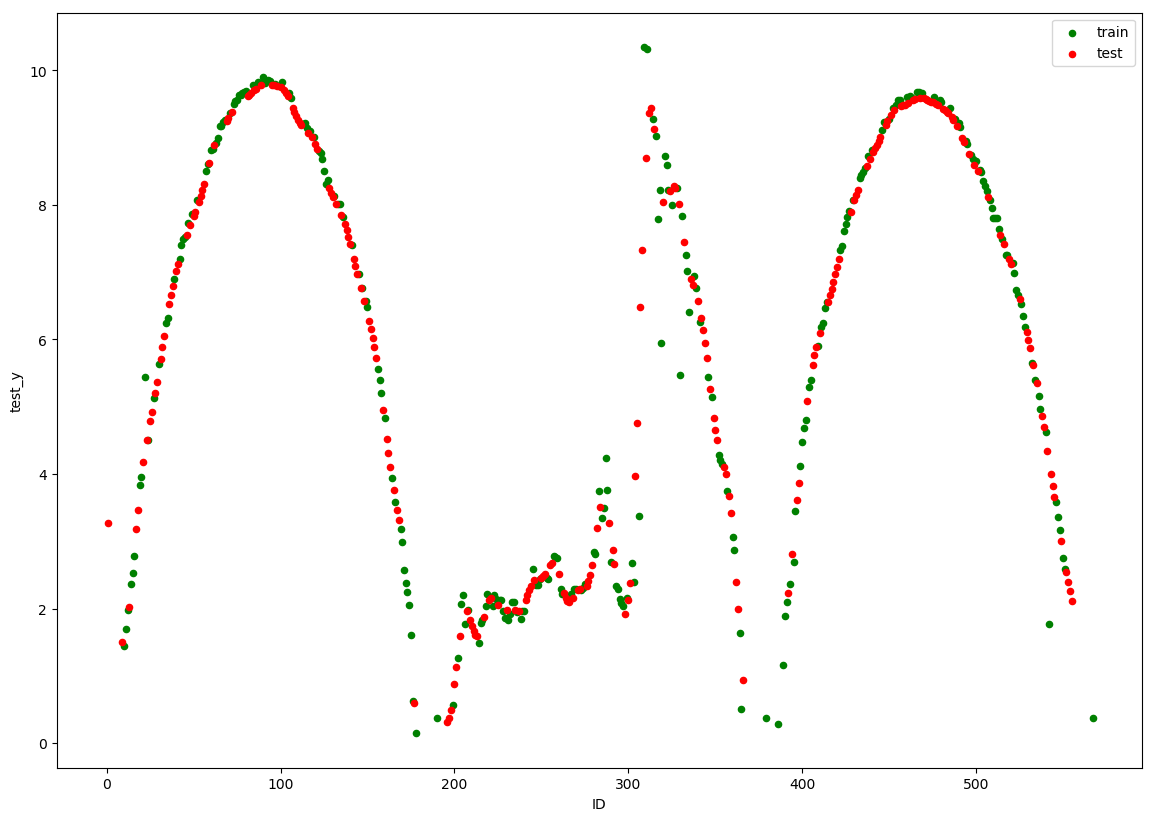

[3.273210444495122, 1.5042744706964033, 2.0270358747792816, 3.1802923128432306, 3.4673962349020995, 4.175237146457961, 4.510712983302803, 4.784866149048488, 4.917958366077077, 5.205105736992872, 5.363976335306461, 5.7065930263732945, 5.883052118314759, 6.057124169735708, 6.531181479666355, 6.667726058664932, 6.7936974257940665, 7.019056668554491, 7.121194080613409, 7.554867448275405, 7.6975309614376375, 7.832147124168889, 7.900723409364691, 8.049680060291724, 8.132740986830992, 8.222151326727165, 8.317278918387206, 8.61808163494593, 8.886165262890888, 9.248156011946808, 9.290525981731697, 9.378686831399534, 9.623938871319485, 9.639967442226222, 9.658761808610747, 9.704430860418952, 9.729000017689884, 9.787119660633644, 9.783077644274082, 9.778042294943516, 9.768863263719226, 9.750034595894899, 9.703880147592919, 9.666686105930747, 9.619968396271055, 9.441158006947457, 9.37840991431685, 9.3192678660645, 9.266091157025157, 9.22026053666595, 9.182017877824249, 9.073430062670427, 9.0070167

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

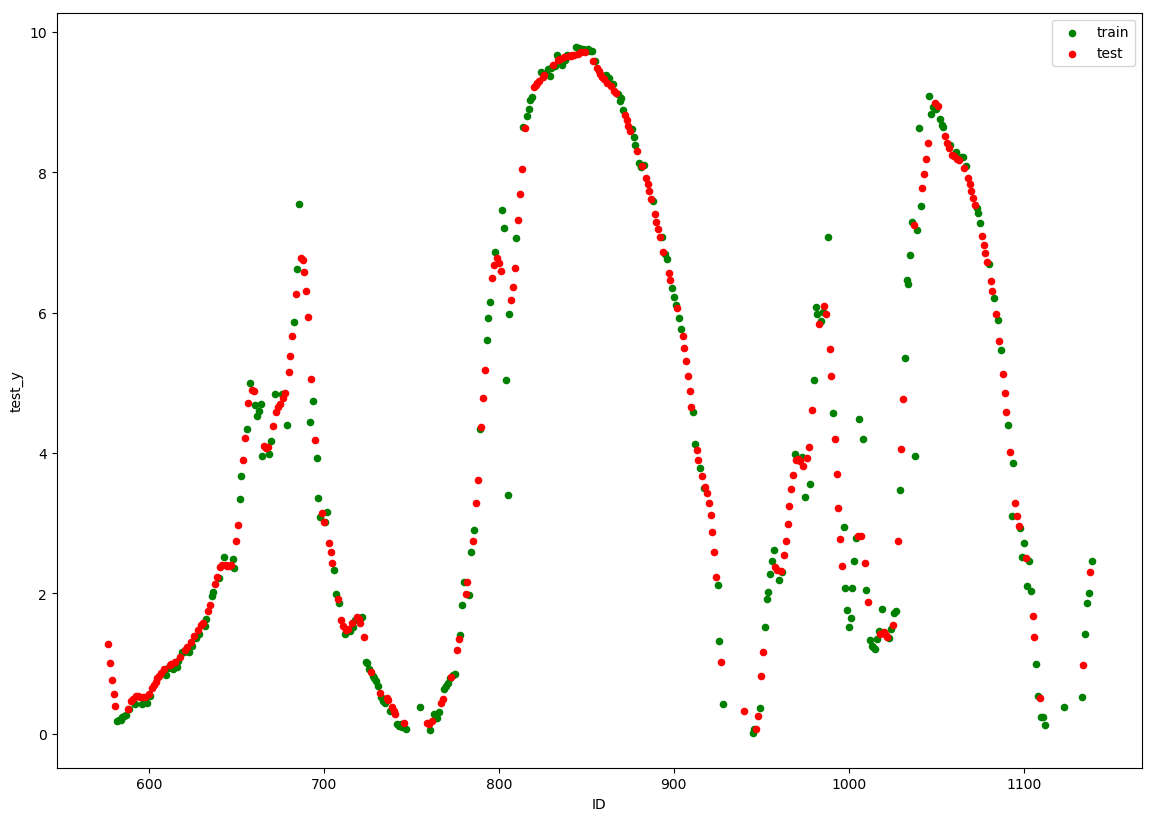

[1.275052971035401, 1.0067443784113164, 0.766211094614786, 0.5622368577670787, 0.4012024465220909, 0.35360864863278874, 0.46439731937671125, 0.5025596353760902, 0.5365547372011039, 0.53669199178792, 0.531236174665342, 0.5234689929099505, 0.5295304519127821, 0.5720810466445974, 0.6507076443073969, 0.6974337167058611, 0.7448618227659489, 0.7901217780282743, 0.8310739434571537, 0.8665131923499687, 0.9206469176188845, 0.9749738625345215, 0.9911743807749751, 1.026715223906637, 1.0956862820793698, 1.1918407581660349, 1.2305234372718425, 1.31462799444283, 1.399541766644227, 1.4762324837844183, 1.546487206661738, 1.5845366469361841, 1.7519273745615944, 1.8338079960628106, 2.135483638280244, 2.2333296435185854, 2.37668932049111, 2.411454836492142, 2.412139754045003, 2.3954948091195107, 2.3864629555364605, 2.402098150442784, 2.740352130854908, 2.9715972269238775, 3.9002515693344804, 4.216092321575902, 4.708987571796339, 4.904320621942961, 4.8795960330438835, 4.098104381687778, 4.066194631710342,

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

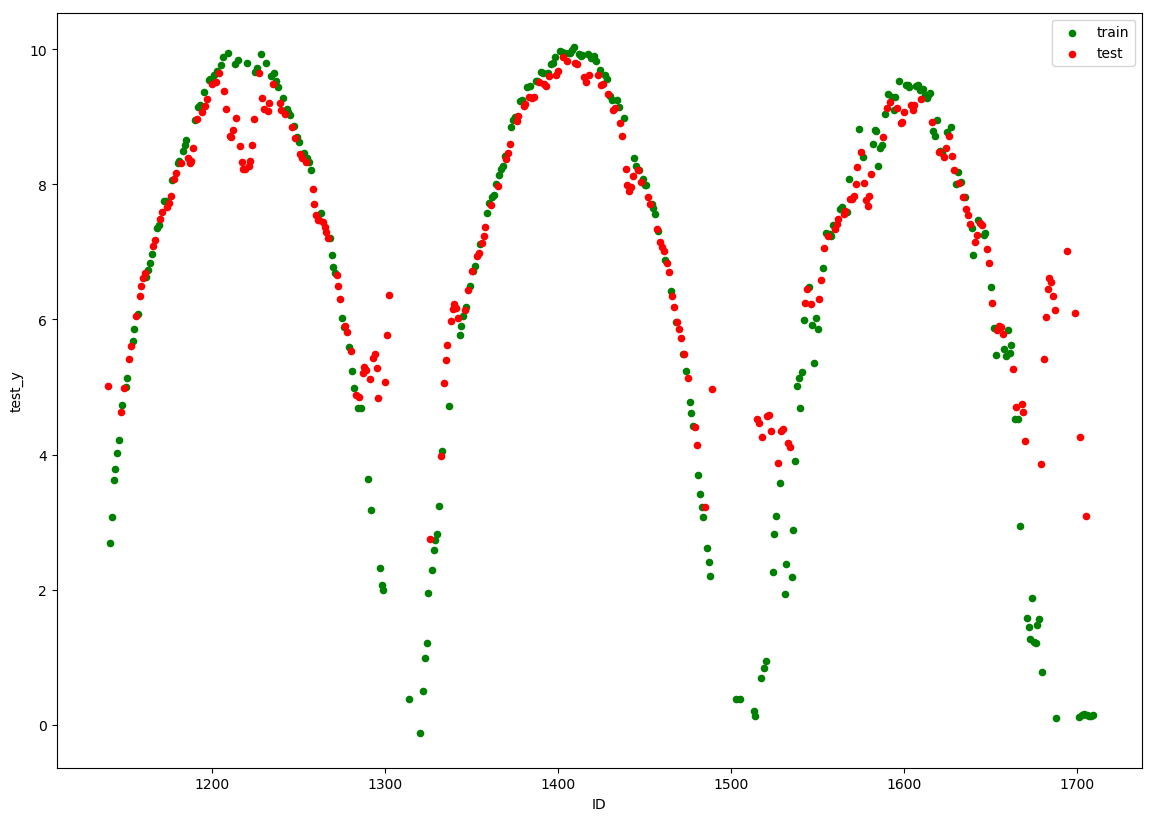

[5.011029812268637, 4.631178557218954, 4.983639321815339, 5.413236994702448, 5.605574043169131, 6.046386267234886, 6.343944350750601, 6.499430986657049, 6.614502770698003, 6.682450464194675, 7.0846206644674155, 7.171734329622563, 7.4834515097449525, 7.591366669484788, 7.67004971839868, 7.719700575434886, 7.827501978556167, 8.080641432068733, 8.164421408235572, 8.310439690731705, 8.395097134294948, 8.312297455812361, 8.349737229315963, 8.532326355318114, 8.964242672157212, 9.066910479532734, 9.15441767652339, 9.259263605311396, 9.49131225649459, 9.515082189842587, 9.647016003031158, 9.381021543947098, 9.120234645113927, 8.723595155576465, 8.703467226075134, 8.80805527311212, 8.975712766601298, 8.575850777804837, 8.337096987492158, 8.22295481692535, 8.223060354003294, 8.27092821120089, 8.346550207211008, 8.5786774317322, 8.967352923671255, 9.651768390946774, 9.283509395371869, 9.1223898057448, 9.091919369612047, 9.2072154685161, 9.492155476302457, 9.207253000190128, 9.108680111288248, 9.

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

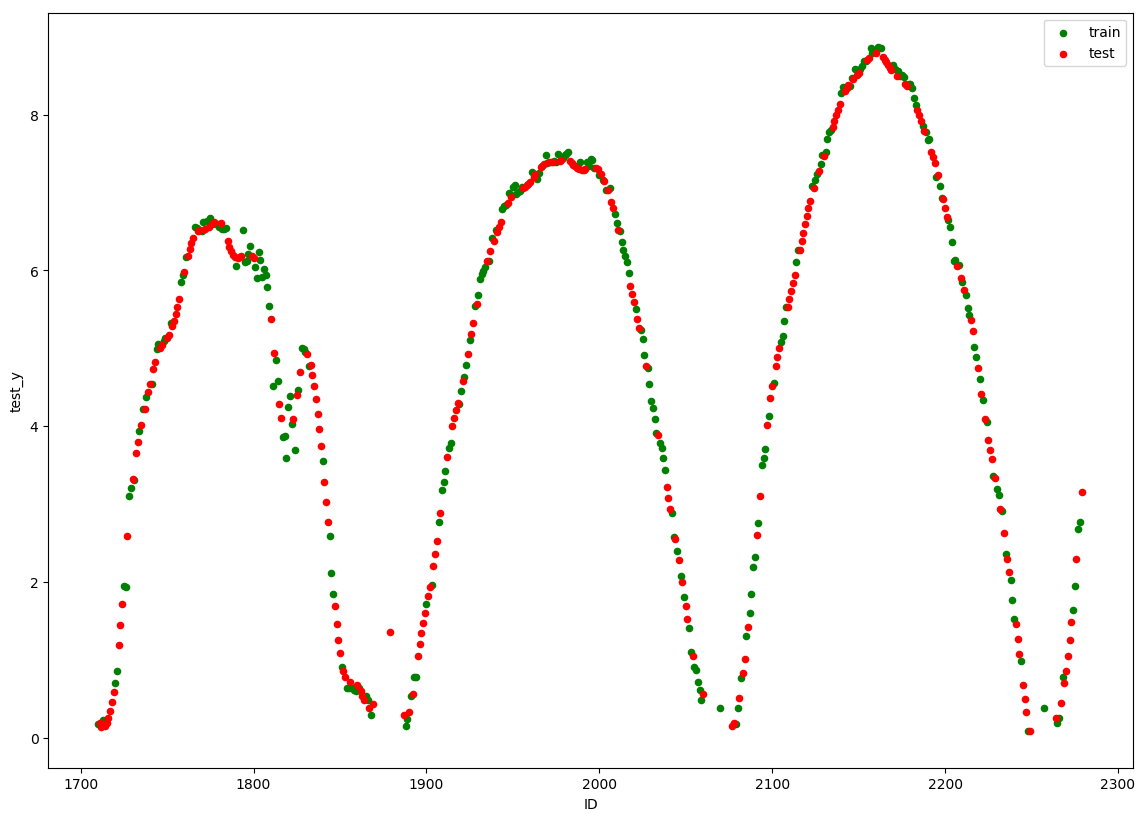

[0.18352225838134562, 0.1375195639967286, 0.14426086981038466, 0.18725341452277267, 0.25263154936586396, 0.3399920164866419, 0.4509092474305607, 0.58822918396785, 1.1825802749716896, 1.4401502251537899, 1.7196777882795482, 2.5941403549558206, 3.3187304969467197, 3.6568883790208306, 3.789758409809661, 4.01425270511643, 4.22161859009739, 4.4329833436967405, 4.538149061828717, 4.732950715137861, 4.81657540785762, 4.996210917227504, 5.035520318018432, 5.134024207109245, 5.173084988100882, 5.279620264861828, 5.350637001231503, 5.434100361226061, 5.529117358594443, 5.6337812578619255, 5.974627789152577, 6.1859292316064405, 6.275654631056394, 6.351180612990846, 6.4111376385240195, 6.503044928637631, 6.512116031803419, 6.525200696393319, 6.551410776087214, 6.595263038985992, 6.617146922107377, 6.606250268298931, 6.371656954049914, 6.302809186574675, 6.242446424940851, 6.19567053817924, 6.165451738275963, 6.153637474995856, 6.16560860461904, 6.182671863059165, 6.181423893818179, 6.1613480040588

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

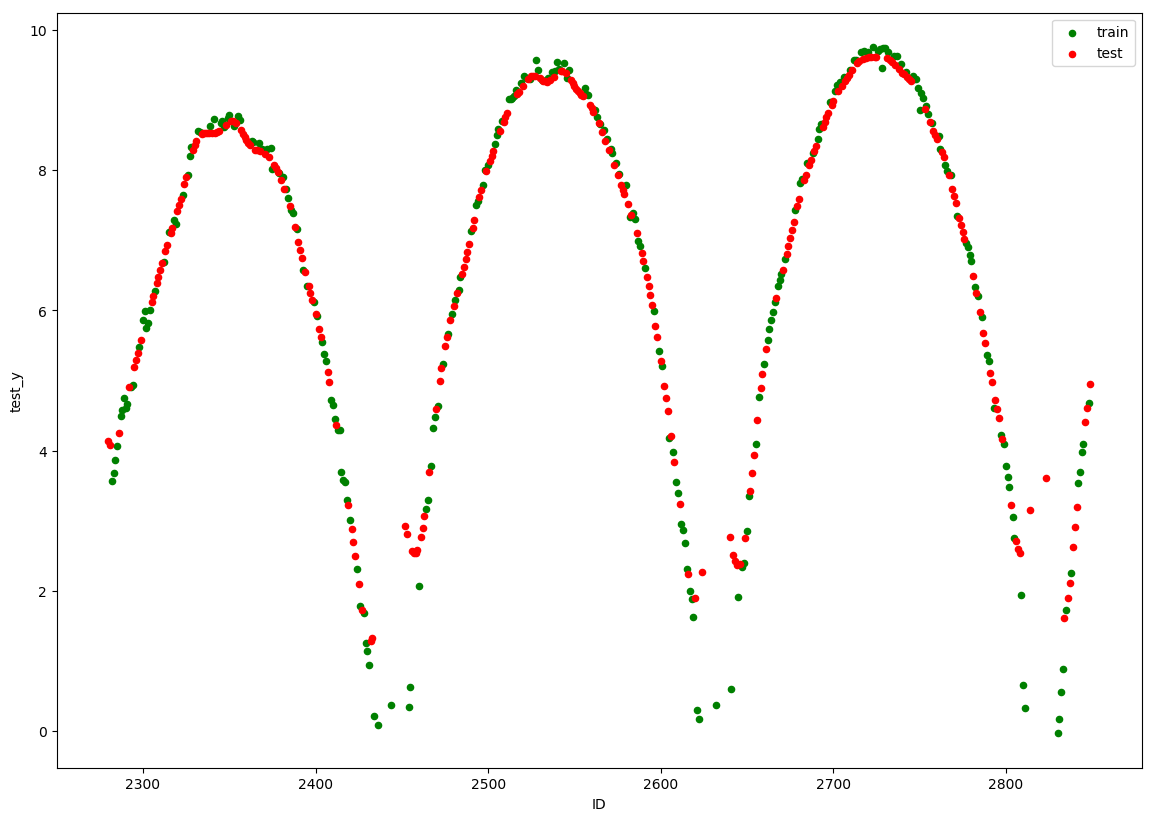

[4.142204958388135, 4.07611940412176, 4.25506804451088, 4.9026180740107, 5.197263187535069, 5.293680690312808, 5.3899730026903745, 5.5805964520912985, 6.112708737317921, 6.200800496144908, 6.3838728497542485, 6.478578382550657, 6.574205979531633, 6.669330773151121, 6.852211022916226, 6.937900938448835, 7.097632842773285, 7.1739038814962175, 7.411508902488192, 7.499767679083411, 7.594110231625551, 7.79815024315235, 7.903994635078783, 8.283992580271189, 8.354464781633103, 8.41192565530485, 8.50977608593504, 8.522209188801838, 8.527904005555564, 8.529050868173815, 8.527734519403232, 8.525008053236764, 8.531653189800588, 8.540892784544594, 8.55461222176747, 8.64249599387716, 8.695407534016562, 8.69862910256201, 8.674357832122979, 8.567274546854827, 8.520526356691287, 8.473097860359601, 8.42792372976438, 8.387460456133635, 8.353411990869853, 8.29302207497137, 8.283661693034055, 8.269858504189745, 8.232884267366057, 8.184259497126044, 8.07343683697536, 8.027643494952878, 7.977704758913009, 7

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

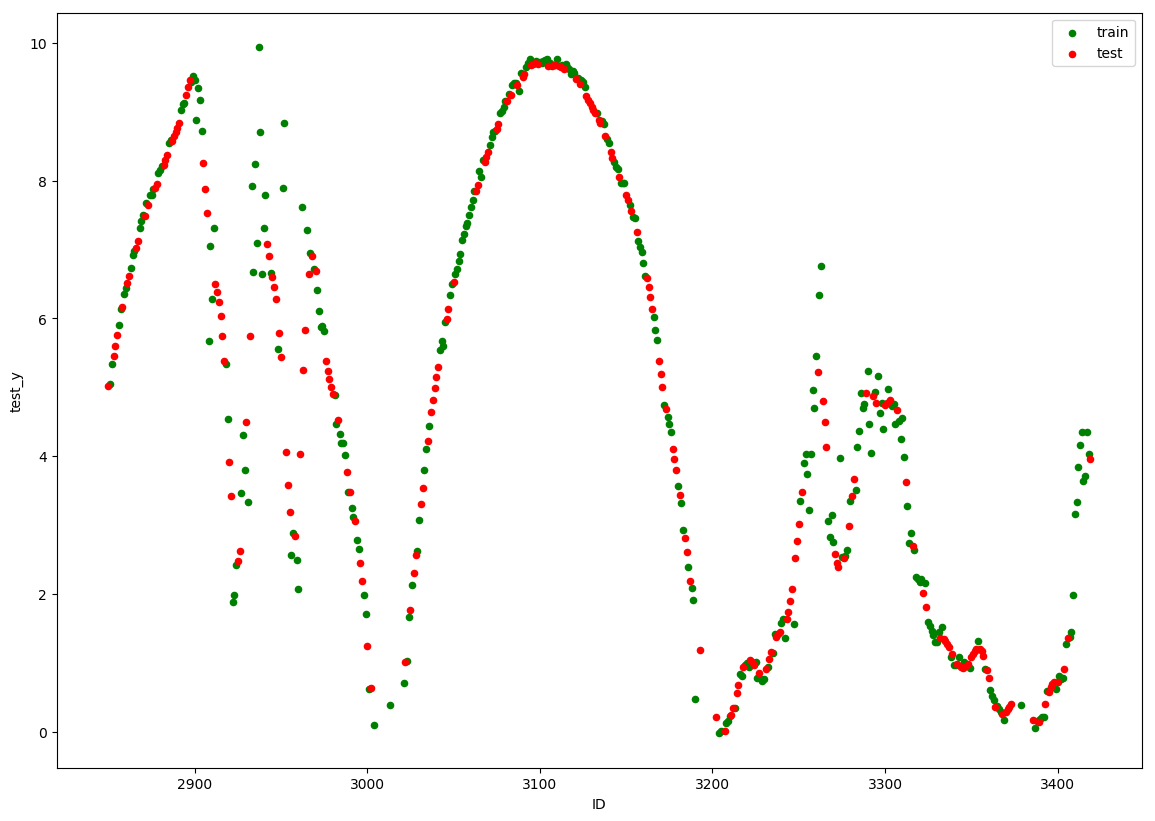

[5.014103995361571, 5.450108881927239, 5.60380215514035, 5.75514613455732, 6.168547792754935, 6.509993855155816, 6.613592993278033, 7.019136979310442, 7.119942834855303, 7.490088745590102, 7.641142641854579, 7.891519276185457, 7.952393426583344, 8.22402155065031, 8.298023615949816, 8.372051922109307, 8.579839637632318, 8.642951856730932, 8.705246221583902, 8.770005706936939, 8.841264489070447, 9.239942437362096, 9.355166829964523, 9.456983430273217, 8.252488526033293, 7.880101519544948, 7.525901090999465, 6.498870845295784, 6.383378157451987, 6.237435556891309, 6.032816510831234, 5.74992703944482, 5.381991850558428, 3.9199956217004823, 3.424690407175645, 2.474612490157138, 2.618599250507933, 4.499160004521961, 5.740961255241133, 7.07966908077986, 6.910721989612625, 6.602584130046062, 6.45038464011388, 6.277253659988894, 5.785789718298986, 5.437984380877336, 4.056713728993275, 3.5858000561677423, 3.186043332331779, 2.843353759778288, 4.029618749496658, 5.253468225756855, 5.8243141783638

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

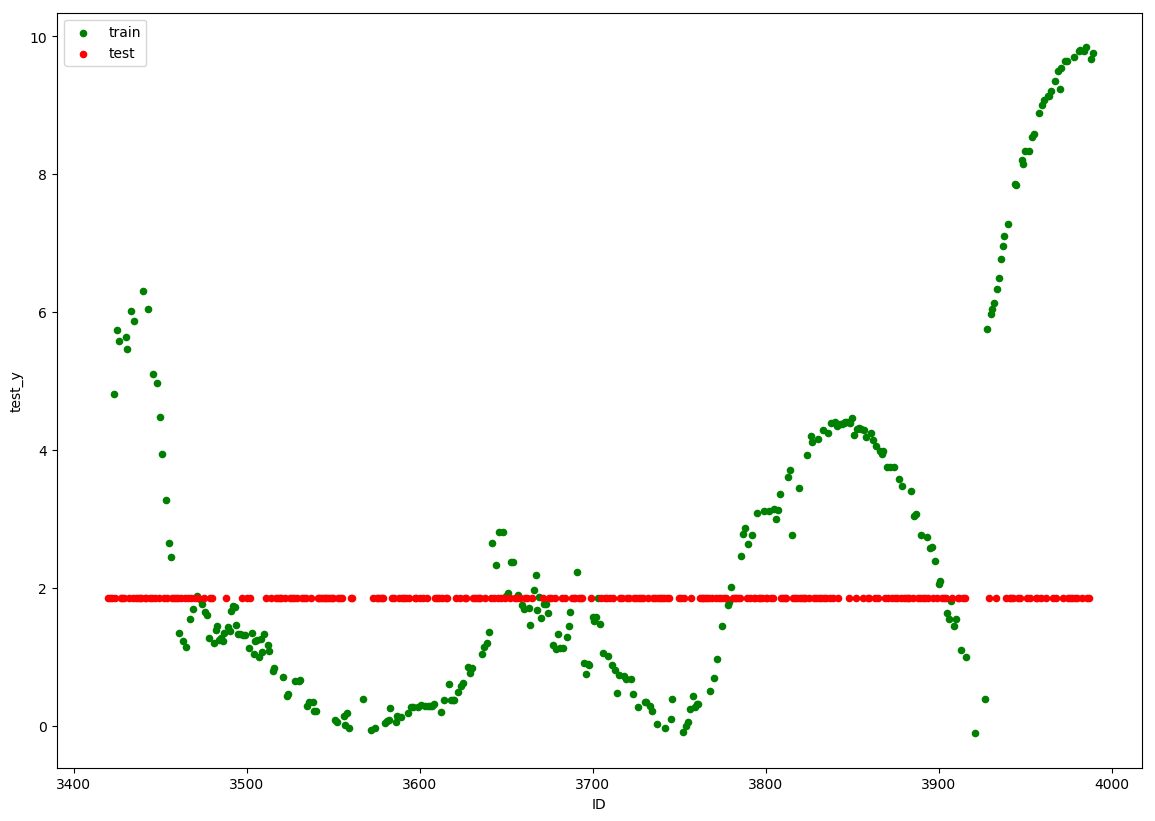

[1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955, 1.8511365622380955,

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

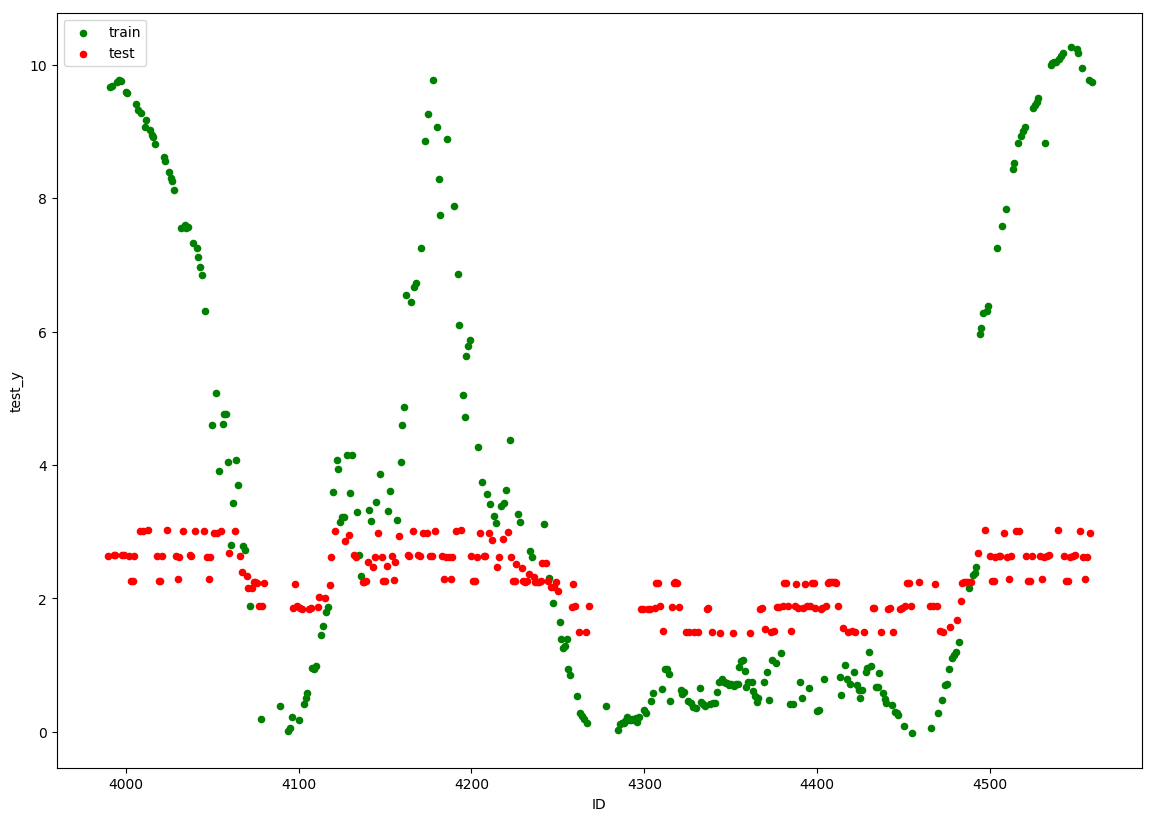

[2.634228389158556, 2.6526675503726636, 2.6527908476415756, 2.6527908476415756, 2.6526675503726636, 2.634228501707619, 2.266595880116574, 2.2665958801304615, 2.6342286142289053, 3.0022313526553717, 3.002231465204434, 3.020547104079281, 2.6343520240329923, 2.2665959926656365, 2.26659588014435, 2.6342286142427938, 3.020546991544106, 2.6344753213019043, 2.2847882217641717, 2.6161597949622326, 3.002231240134085, 2.6526675504004396, 2.6344754338370793, 3.0022314652044346, 3.0022313526692597, 2.6161596824270577, 2.2846648119461976, 2.616159569891883, 2.9839156012592385, 2.984039123584612, 3.002354762473346, 2.675624981171866, 3.0029029532357394, 2.6336782326385135, 2.399261230597362, 2.3382027861534427, 2.1575390858068153, 2.15309040744715, 2.243306266470586, 2.2478780494760433, 2.229717641152495, 1.8801538679094647, 1.880153867913049, 2.229717670195757, 1.8615914094161412, 2.2112785089538733, 1.8800302330120782, 1.8617257385521884, 1.8450364566449855, 1.8451056919363524, 1.8553946122496314,

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

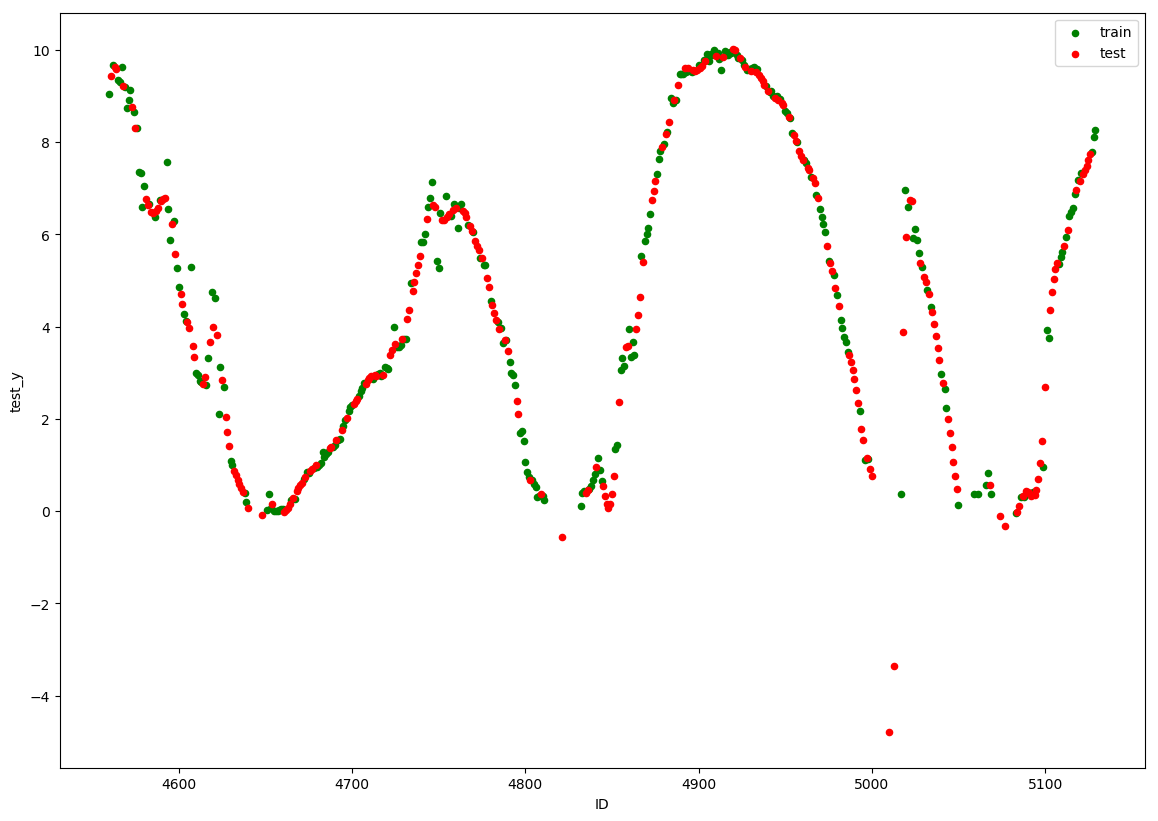

[9.425958398585397, 9.623399043877981, 9.584335938073268, 9.207261115926418, 8.75953421139767, 8.305749521255903, 6.768091049558692, 6.634912903347275, 6.488649259619439, 6.466779865651866, 6.510438298873051, 6.56893455162226, 6.716652632400175, 6.774393166108002, 6.794709575942954, 6.214191068972921, 5.578384044073243, 4.698633760776028, 4.499597357770717, 4.10137903803061, 3.9617598556968807, 3.574253026483532, 3.3345896685229732, 2.746430479447774, 2.9044239344781393, 3.672960971673888, 3.981788168024771, 3.825327790239726, 2.838971768786121, 2.048152274991541, 1.7050072312681581, 1.4178247753054336, 0.8801877279305037, 0.7746540845352228, 0.6839216246450208, 0.5968535691303849, 0.5056573205068027, 0.40631780126307016, 0.07226478726232255, -0.07357456833517428, 0.14902973931353314, -0.021189293589221947, 0.020975846931039044, 0.07805312955841881, 0.14483041365703553, 0.28898349087737474, 0.4285774173915087, 0.4941911316210392, 0.5571112771712636, 0.6175376015574443, 0.73064001181757

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

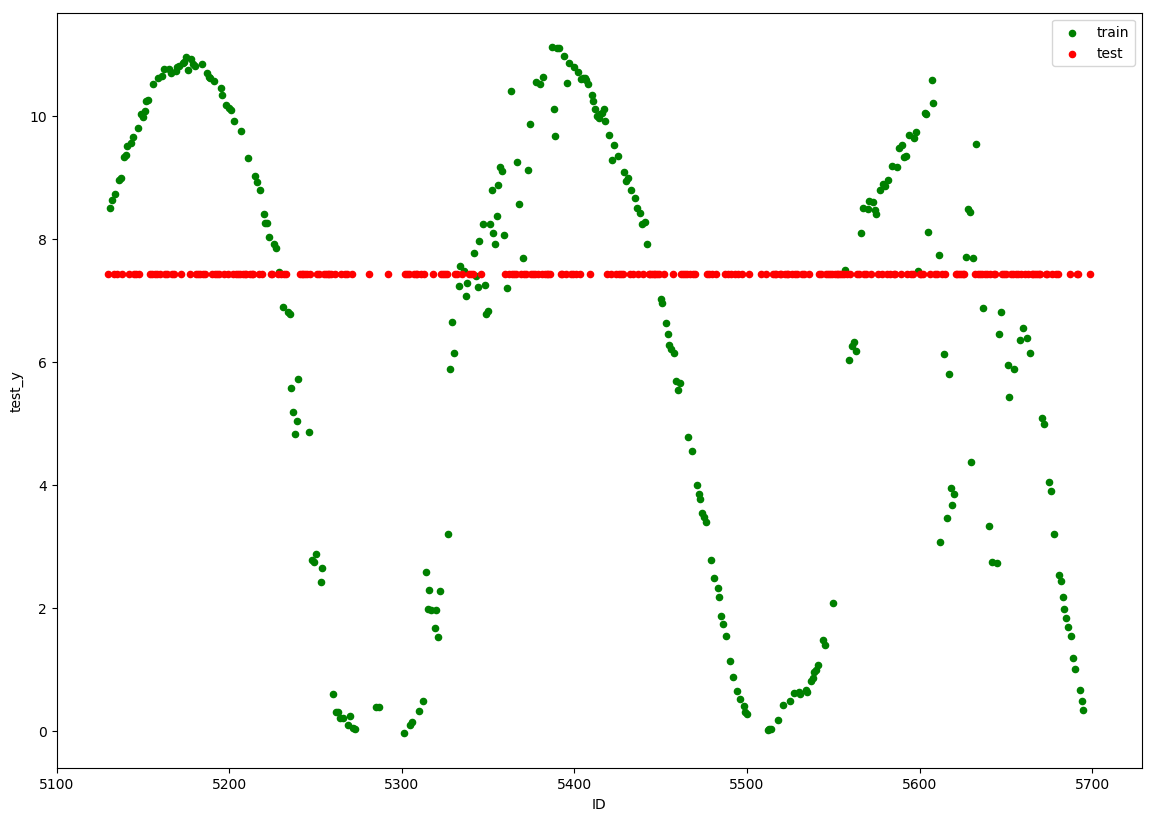

[7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400636365, 7.434573400

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

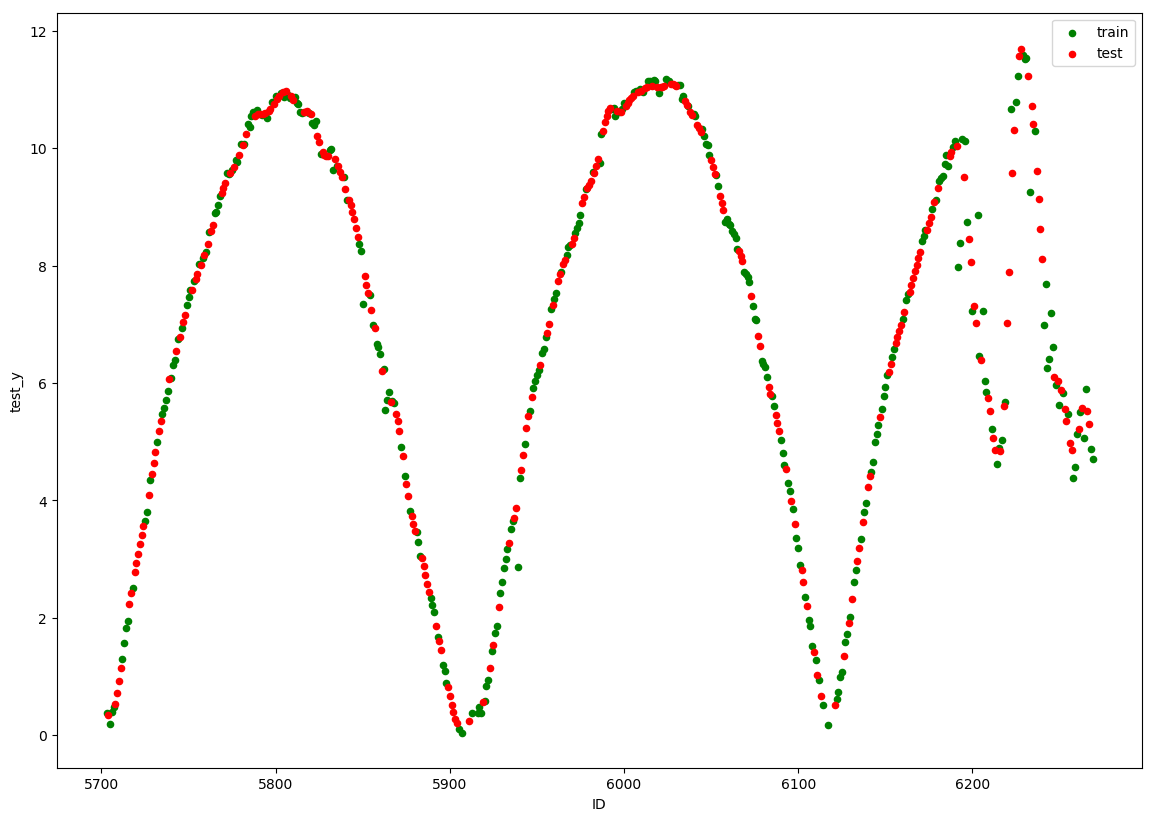

[0.342445646111023, 0.5359059291098252, 0.7177299884107944, 0.9268309745457666, 1.1511757189385357, 2.236607704778349, 2.4242002866254753, 2.771485834415803, 2.9348892385108507, 3.0943412057616433, 3.252120524419335, 3.4104711882706975, 3.571455752708245, 4.084134134308327, 4.451988595166769, 4.63978695238965, 4.826854435173454, 5.187807226837673, 5.356982909125951, 6.064278490268823, 6.5439674002570305, 6.787012379354261, 7.031006031918735, 7.150374928308419, 7.582172123739499, 7.765110597804541, 7.850387523571042, 8.015984811880767, 8.186434867138335, 8.37341489071268, 8.581856405330443, 8.692890565528732, 9.234963202363323, 9.323237848770948, 9.400942419222897, 9.580275774437757, 9.68341796977272, 9.882048364782248, 10.057819123344853, 10.246699072330147, 10.55512487546539, 10.580919948667628, 10.582399695914798, 10.584579386437369, 10.592673878475715, 10.63300056859441, 10.6656120839206, 10.749584840679276, 10.843909716355306, 10.888293063426985, 10.956031206443502, 10.974616796342

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

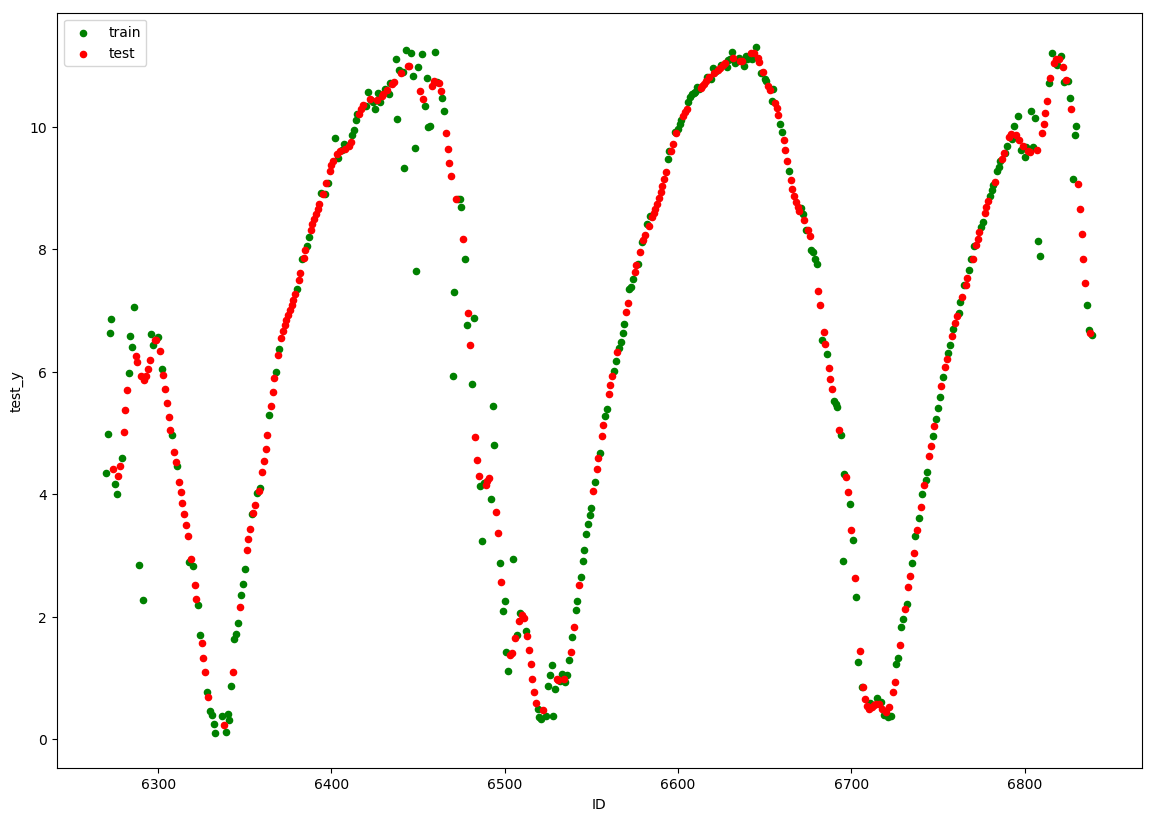

[4.403276078046465, 4.287934576502096, 4.451510252785209, 5.022191456469146, 5.366748580353189, 5.69893208197491, 6.259024766672996, 6.152857846200778, 5.928194465367109, 5.870940277819046, 5.9340952845339565, 6.047630392059868, 6.189878517990096, 6.519253601403392, 6.523657829259255, 6.331646060619245, 5.939567439533058, 5.710009729865556, 5.479511711402698, 5.259106881810753, 5.0544811340137, 4.691516246199926, 4.525059990832144, 4.197081211460681, 4.02888348812828, 3.856276991178009, 3.679580763176756, 3.499361988108473, 3.3156470558822235, 2.932868612857961, 2.5150672774455325, 2.288908534911169, 1.5611781064450119, 1.3191553769552273, 1.088627208665855, 0.6862117665481016, 0.22599481886958994, 1.100509076290126, 2.1529400235376244, 3.0808882835465856, 3.2638615404238327, 3.4256424090827644, 3.696443491509924, 3.8157484091792444, 4.058552543377173, 4.355994114106931, 4.537283120990573, 4.740947990130352, 4.963352486218839, 5.436759509553607, 5.670577243775057, 5.891271213074754, 6.

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

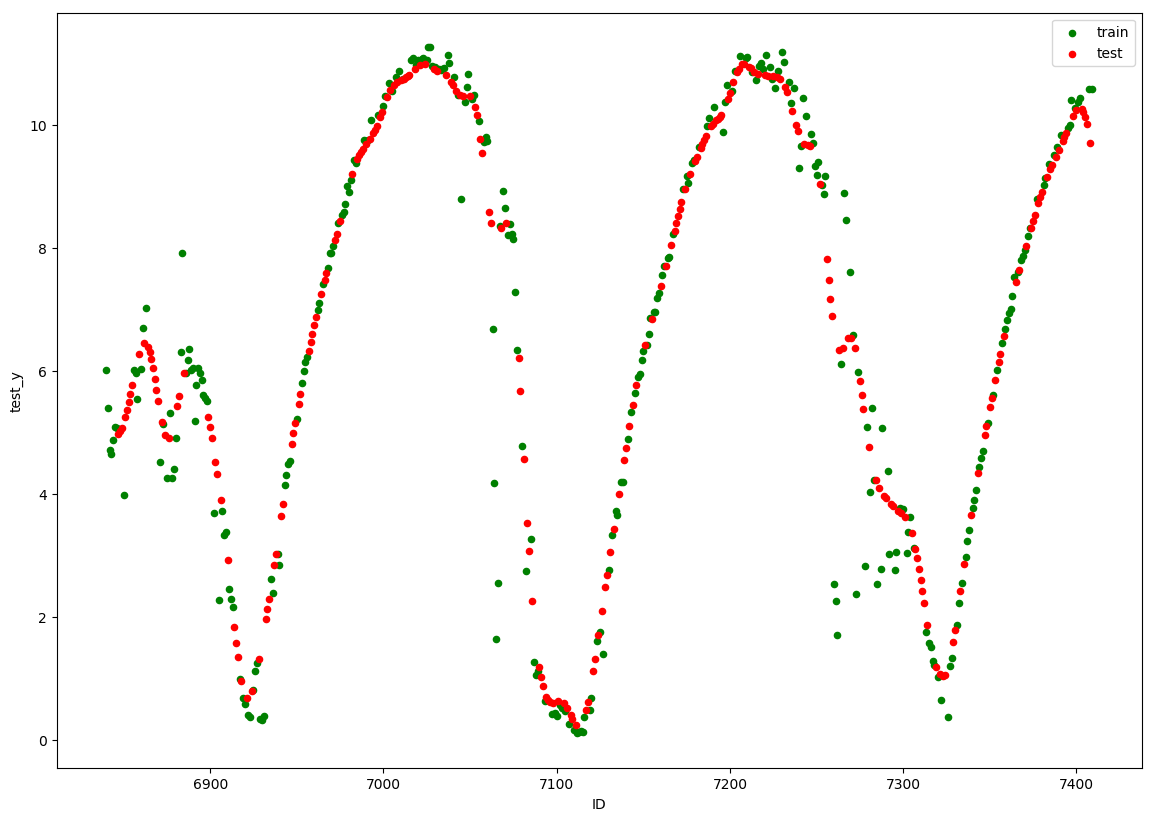

[4.982106802589405, 5.016623012011958, 5.074746993251654, 5.252447242719071, 5.366422035002292, 5.492913981862616, 5.628331786364096, 5.768649843231193, 6.28000932539984, 6.452187202586084, 6.394707081789237, 6.3098419318123184, 6.190604677938367, 6.042225321335189, 5.872103294898657, 5.6894231012411645, 5.504598961572866, 5.17210489274098, 4.954667761062709, 4.9042413561282405, 5.432802849903771, 5.587579054036841, 5.972504252957241, 5.253195010826207, 5.0883697652613655, 4.911349017207353, 4.527644653643989, 4.323855382921966, 3.8949148875601454, 2.9300451375376664, 1.8448665623223546, 1.5857038728537916, 1.34656977611934, 0.960109283327804, 0.6909098037836419, 0.8038062372662838, 1.3229723636345074, 1.966685682756184, 2.1325693109144392, 2.30155807785411, 2.838907425147035, 3.0304878265233746, 3.6357561608998727, 3.84204995649359, 4.813860556370071, 4.98724555020153, 5.153303543320963, 5.46708758566224, 5.617030093045608, 6.330930647912626, 6.468921920832011, 6.605220600941699, 6.73

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

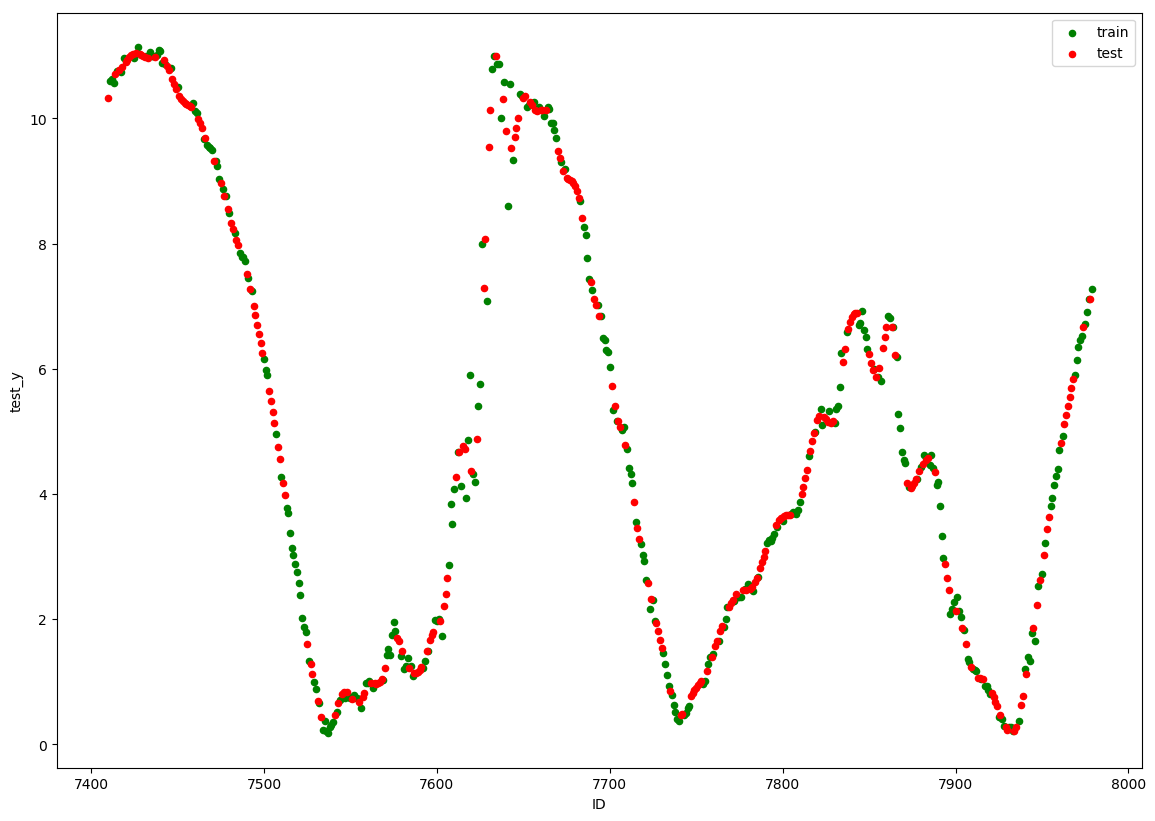

[10.319315635866133, 10.709412328704708, 10.77123403467139, 10.828879622029504, 10.902125754909957, 10.941042077517963, 10.977235303833073, 11.007468697702539, 11.029281531340043, 11.043881069538083, 11.025983621570907, 11.01055530624948, 10.994546116769051, 10.980469771638557, 10.96482470070718, 10.981832818267172, 10.93334166241463, 10.839344140449334, 10.775672682846299, 10.62713144383866, 10.549649127502688, 10.475515032718347, 10.3515803018514, 10.306264268606665, 10.272554297060355, 10.248789043948095, 10.231879629221664, 10.217753626659066, 10.201961656085103, 10.180343777623346, 9.991434760533725, 9.919997676486444, 9.843416423068865, 9.686285534434798, 9.319837724626211, 8.9760244388637, 8.766086500537673, 8.545658567714531, 8.334200625314818, 8.236414224968682, 8.058191812247683, 7.975214875447625, 7.517923072874911, 7.276376122456805, 7.000842968849845, 6.854993923407861, 6.706551338370404, 6.557165819123163, 6.407805963859095, 6.258638826042839, 5.644459023495489, 5.4794506

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

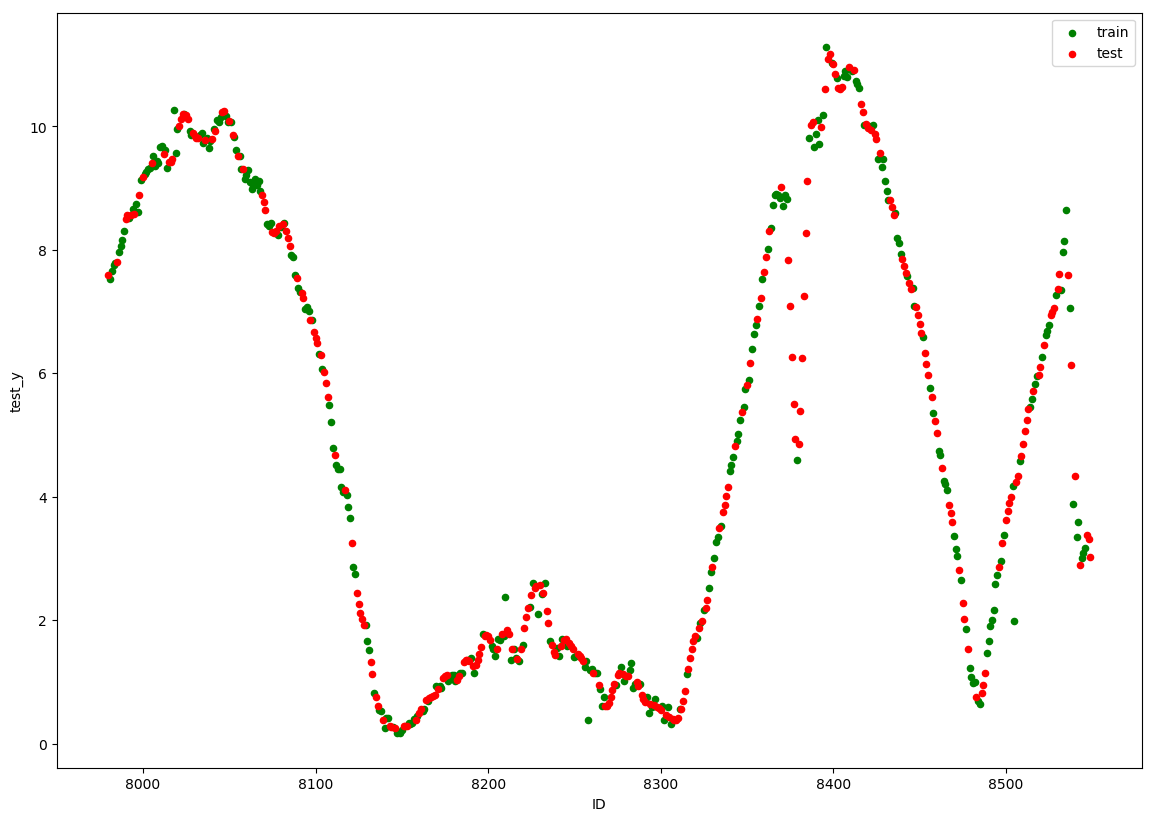

[7.597964577758907, 7.805816471123093, 8.500257241831129, 8.557614120031749, 8.568976269199382, 8.584049537003509, 8.885576721385041, 9.178550380157834, 9.406377103935865, 9.55093535319019, 9.422712346356235, 9.420036825174236, 9.465616523991049, 10.003677376170522, 10.122014257164428, 10.192391141801032, 10.176679942376454, 10.110258380996513, 9.883617318445731, 9.840204545560727, 9.816908425058172, 9.807505567993921, 9.773482761288093, 9.79841303725064, 9.930587106297452, 10.236669174654446, 10.254897981887524, 10.086403517762141, 9.853247110417861, 9.52602514123637, 9.310790799431821, 8.881792825843682, 8.775062492705233, 8.651063930379918, 8.281830977486756, 8.275721438855477, 8.301999066881308, 8.391933679645433, 8.418247321339688, 8.29934679124628, 8.18835496512435, 8.055720466609491, 7.537922180969024, 7.291539992171536, 7.219549071963537, 6.867205364871075, 6.670314578450652, 6.57778240245531, 6.488681981239646, 6.2969623556830765, 6.025412429012566, 5.840604785542221, 5.622565

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

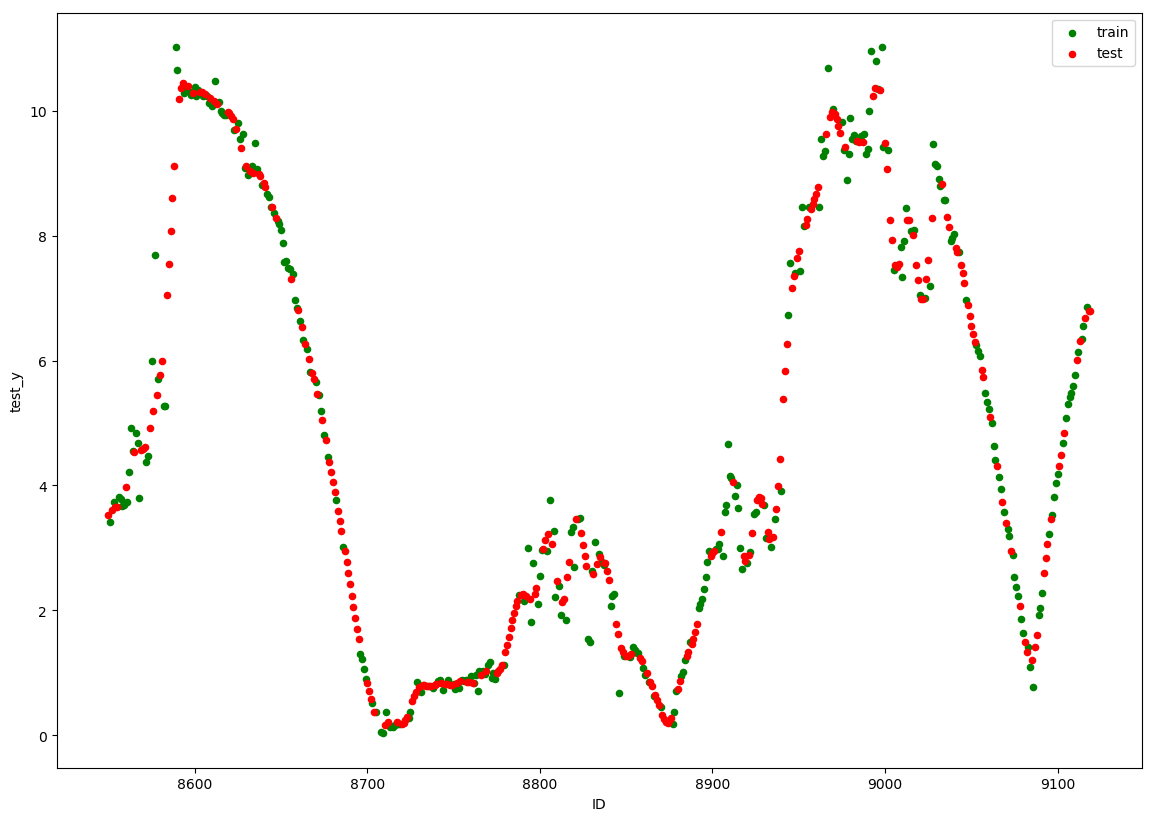

[3.522474701865263, 3.6127618434506403, 3.649943569298996, 3.66014570290091, 3.9813170505965116, 4.544101293898929, 4.574276864117821, 4.584590225306095, 4.622203667652688, 4.914282545397671, 5.185003223173572, 5.45367049004889, 5.770805776939907, 5.989209544494689, 7.054854517798388, 7.544542214204269, 8.071953484280481, 8.605897136296417, 9.112268053985645, 10.192657736273553, 10.365013303391475, 10.451687930209829, 10.401878850351645, 10.292993530337014, 10.301104546076331, 10.299898374810361, 10.273580291104288, 10.201496933905505, 10.156421441070865, 10.116912632355962, 9.98839552774233, 9.957398524834776, 9.917462480422888, 9.865141022075273, 9.714682604871562, 9.399517279927302, 9.122604261940737, 9.03270796745473, 9.008740462831092, 8.981605265320722, 8.951298564871532, 8.848989606638817, 8.781077503346001, 8.46243567522717, 8.287687744049418, 7.3106974754416605, 6.803002917667531, 6.531185729988707, 6.267568187286175, 6.0274022297574685, 5.80867402872694, 5.701094637631451, 5.

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

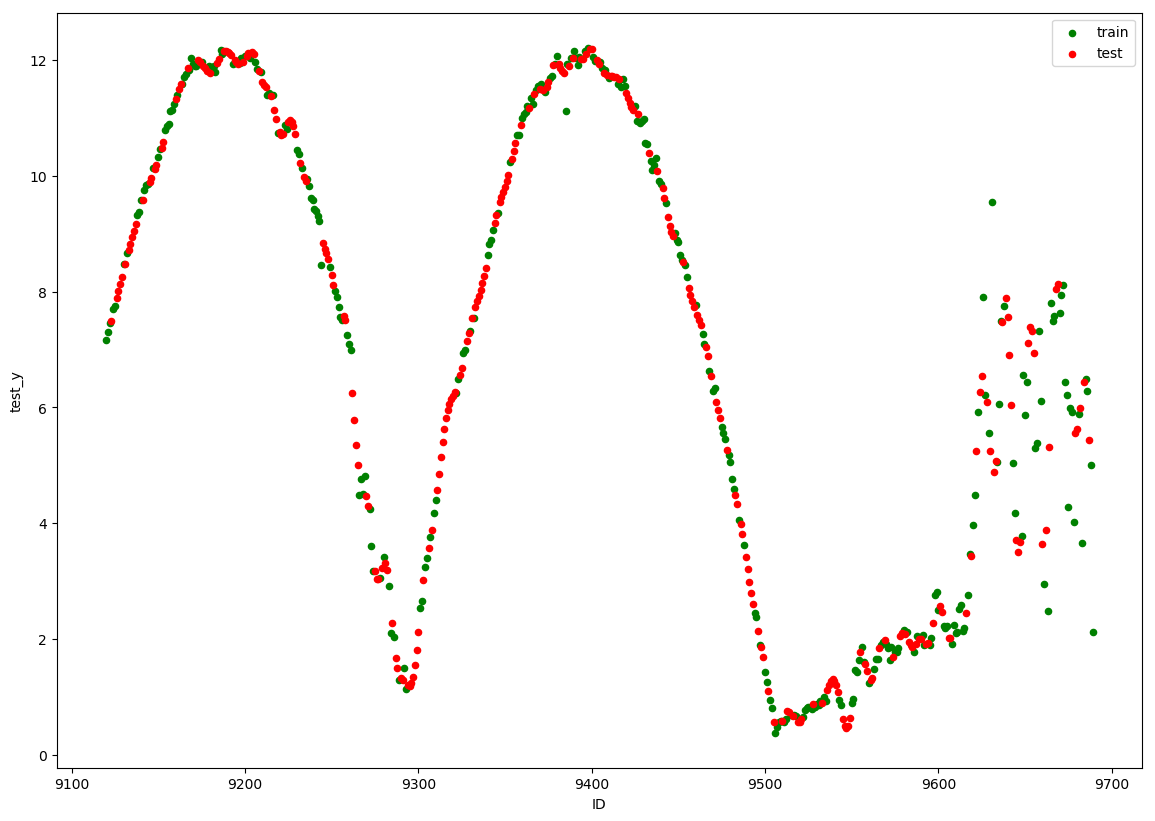

[7.4867621830091995, 7.880824698915331, 8.008271377659527, 8.13212930342635, 8.252265277985511, 8.483526311150332, 8.709385269280675, 8.82259997848067, 8.936441267623788, 9.050446656509997, 9.163513591799896, 9.57397889601339, 9.885355467659375, 9.956821393818455, 10.109240582735678, 10.19364018848886, 10.482328562433263, 10.586966857427136, 11.317769576513449, 11.505410353171403, 11.590943465284894, 11.85651368634446, 11.99177414943999, 11.972391280180707, 11.899634896322697, 11.855690857878912, 11.81612120405373, 11.780026588743088, 11.949704963784471, 12.016966550472143, 12.149111971294452, 12.155531021053541, 12.143457121357084, 12.116536485292222, 12.079483021842996, 11.995599333500142, 11.95940175085233, 11.934231065620065, 11.96510733343148, 12.063872232089683, 12.111360832613041, 12.135609715058283, 12.094111096770252, 11.802191790405082, 11.61751850562592, 11.562378143876757, 11.527330833893904, 11.380700872083345, 11.133011135680702, 10.982586955906854, 10.74694775143691, 10.

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

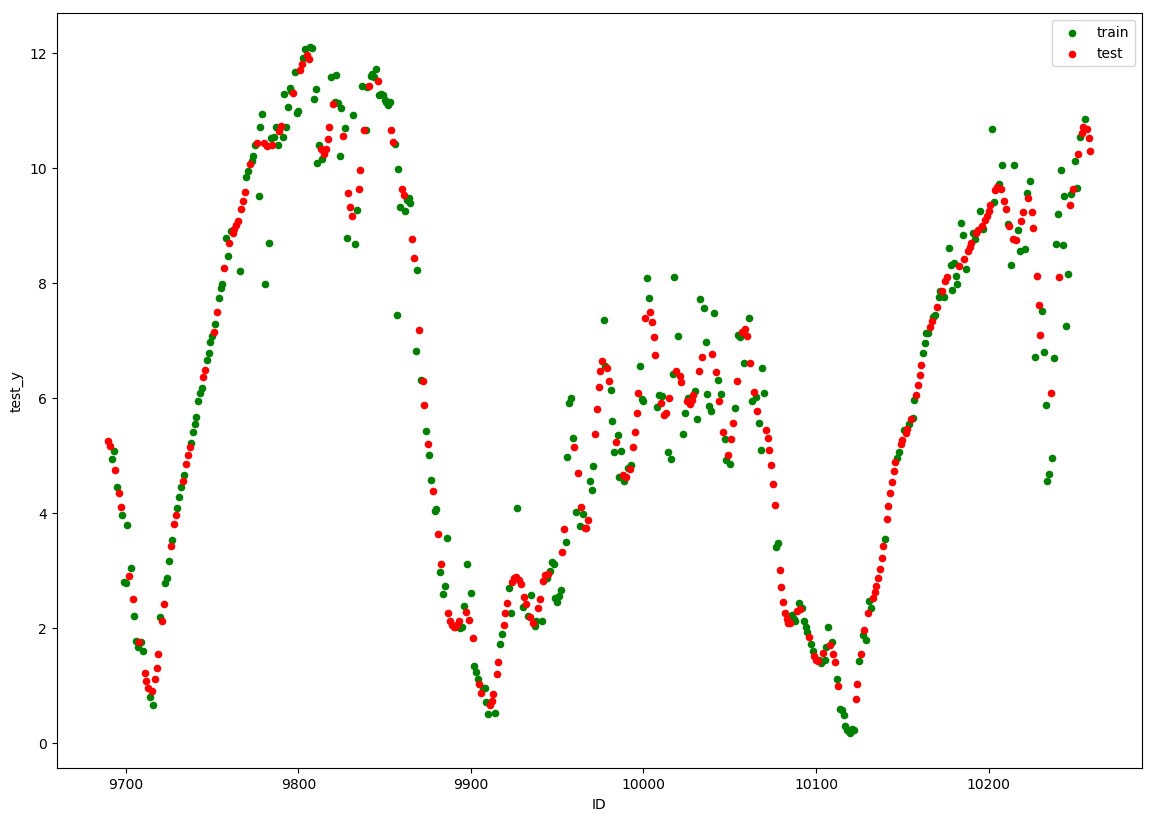

[5.248482136580824, 5.154566392909718, 4.736265657896041, 4.334030394900145, 4.103376566118136, 2.903519242609891, 2.491942150691809, 1.7485156960376802, 1.20859108088671, 1.0614233275180132, 0.9515063791433427, 0.8933945348477597, 1.096692129443852, 1.2925813196592655, 1.5378770204267855, 2.114785006219553, 2.4139135152095994, 3.42676756290695, 3.7933543782031136, 3.953939874803046, 4.5476739766624865, 4.84480935785, 4.995526777215105, 5.147766997582579, 6.35098199287269, 6.482348014811511, 7.148156277454458, 7.488385401347108, 8.256083284627712, 8.690544655653063, 8.863878798568868, 8.931227382875761, 8.998601655642599, 9.075750843297694, 9.286409167880988, 9.4239226524845, 9.578554065426411, 10.06015114991058, 10.434668587673984, 10.428046775448749, 10.383439999946294, 10.389248985330525, 10.63245346799939, 10.725994209477797, 11.300225518594786, 11.697288033401357, 11.809685161199813, 11.958568604299364, 11.8906772867624, 10.3164260198029, 10.236152579213591, 10.330200498497934, 10

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

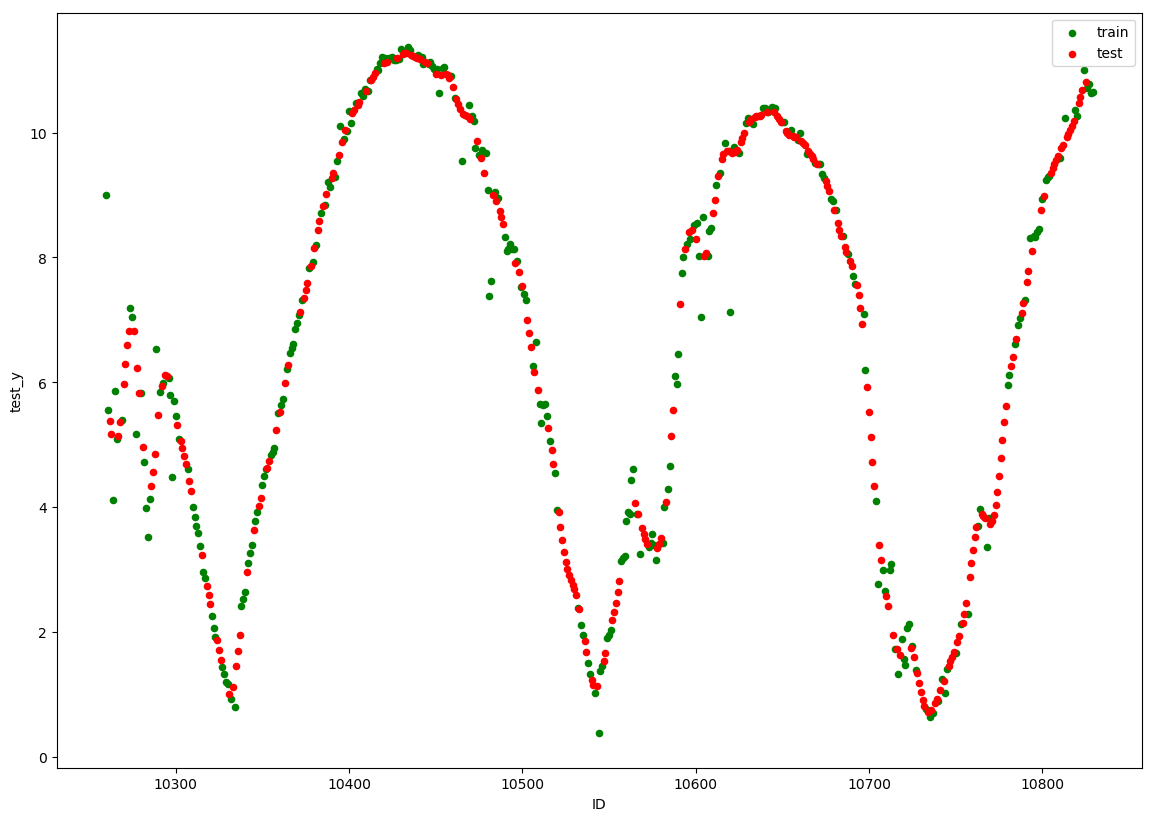

[5.382505562383287, 5.163945859257866, 5.134958338693259, 5.35663118990154, 5.969934224245789, 6.298470968709545, 6.592824468309308, 6.817193131063131, 6.821624888515275, 6.23194922973607, 5.820680098655881, 4.969286175986953, 4.3463563195377715, 4.564239470626182, 4.849796029280457, 5.473971825668979, 5.946886727472879, 6.122406874185562, 6.098670357714978, 5.312498239662394, 5.061784476387864, 4.94358996523536, 4.823752073668493, 4.697945273005476, 4.41821779988034, 4.263153388367709, 3.2269064799223055, 2.736735791419638, 2.5864405411139577, 2.441729281006639, 1.8675500139050847, 1.7134095204350812, 1.5558891908163126, 1.0121838305488478, 1.113445797001825, 1.4522165876932522, 1.6900862563754036, 1.9539479176503498, 2.968604496740344, 3.630737770206634, 4.0194608860782655, 4.147144109493192, 4.6319559617144375, 4.745411930300105, 5.230433675143502, 5.518011364356244, 5.982995113403211, 6.281065736410378, 7.127648054457758, 7.353138475267314, 7.47202761337577, 7.596795272583342, 7.86

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

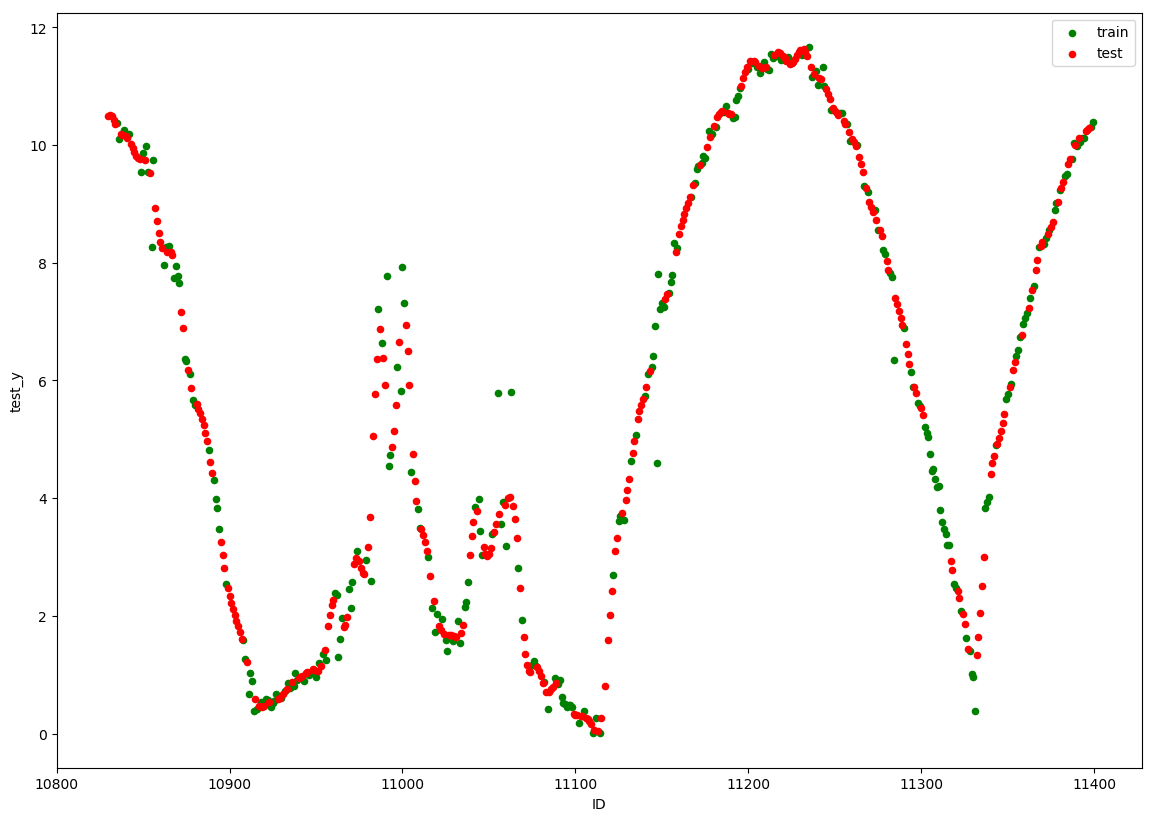

[10.491098109917289, 10.51473697362793, 10.485742840104695, 10.423545121245752, 10.348287870739423, 10.18690424960393, 10.168721783756258, 10.147020946268672, 10.122830902326086, 10.021330653273143, 9.950467844667333, 9.878545380614188, 9.816860238648589, 9.774146892626366, 9.753536705051223, 9.750400139269988, 9.528097106666884, 8.93254877788378, 8.710477470783509, 8.511902313727266, 8.353994934243813, 8.246245814570974, 8.179139834322646, 8.179507410122056, 8.132181491909094, 7.166761128470131, 6.892197458044185, 6.181156770251456, 5.873497048089487, 5.598187578183255, 5.521990674913514, 5.440345769139615, 5.347646815298548, 5.239958671453008, 5.114714625106783, 4.970376941665847, 4.622328075521649, 4.419741910773758, 3.2527979461512126, 3.028910765685079, 2.8224486849228523, 2.475164417910855, 2.3353763359799937, 2.215076158604345, 2.1096635383064455, 2.013454427816344, 1.920427833107548, 1.824960277053136, 1.7224700959738692, 1.6099230525478383, 1.210687304553205, 0.585965646215127

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

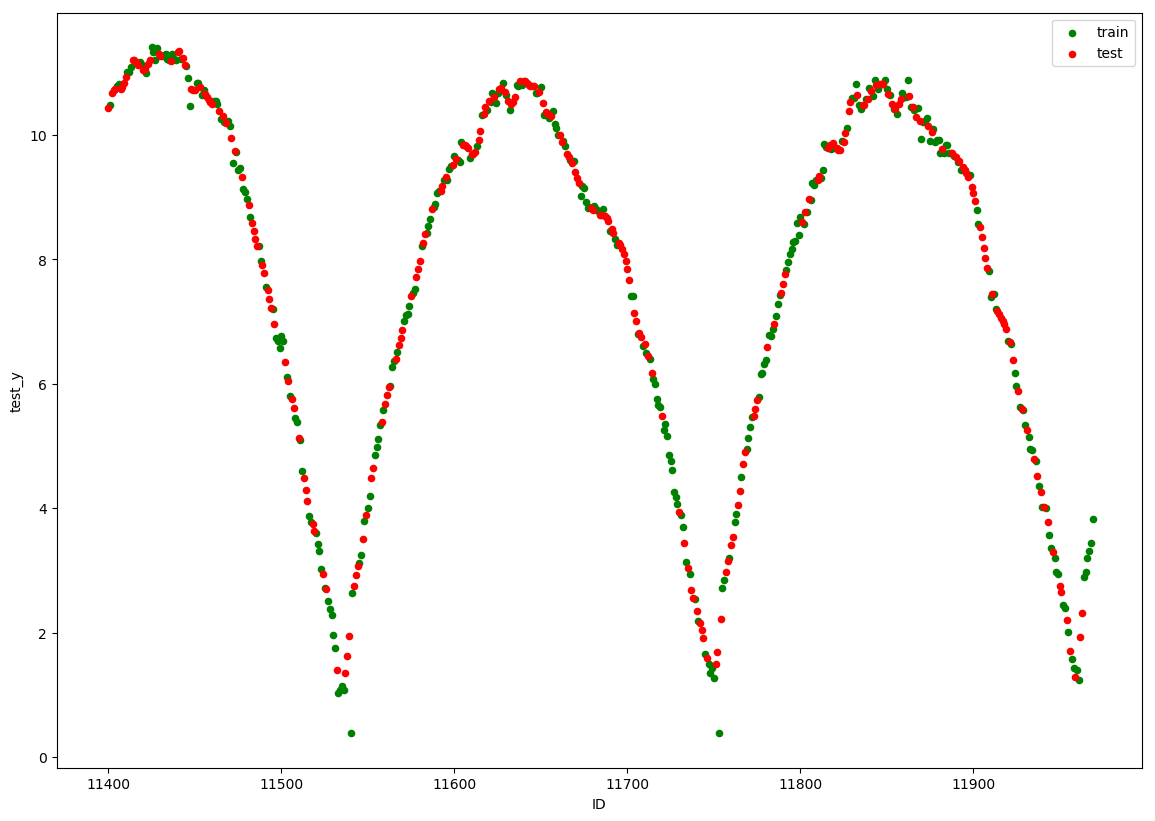

[10.438551632598749, 10.678849308548973, 10.725591104052826, 10.73751932167203, 10.737017382207572, 10.774508410014072, 10.840524359257943, 10.928532138757308, 11.211963188391291, 11.208954520487373, 11.17709182807187, 11.1294317382706, 11.04063918215101, 11.058647355582103, 11.151596031288788, 11.206346246319743, 11.297061360373984, 11.278385281750545, 11.197064845666247, 11.344592685544626, 11.347201203649657, 11.238357189556385, 11.133241023594213, 10.744598472159028, 10.72112081087177, 10.725844445530905, 10.766444170822115, 10.667759291304467, 10.615950589382168, 10.567697460974287, 10.527408599327062, 10.495572102466609, 10.388492734670699, 10.30816162098025, 10.196515255198701, 9.94886265298068, 9.738882345833964, 9.327426608901241, 8.873154983318374, 8.594156969046342, 8.4571699650884, 8.330061244247066, 8.215255629925444, 7.904424395845067, 7.787250997103413, 7.50932808211683, 7.358266900853502, 7.21203945490704, 6.9682624621523095, 6.357746931432369, 6.051098290735682, 5.7525

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

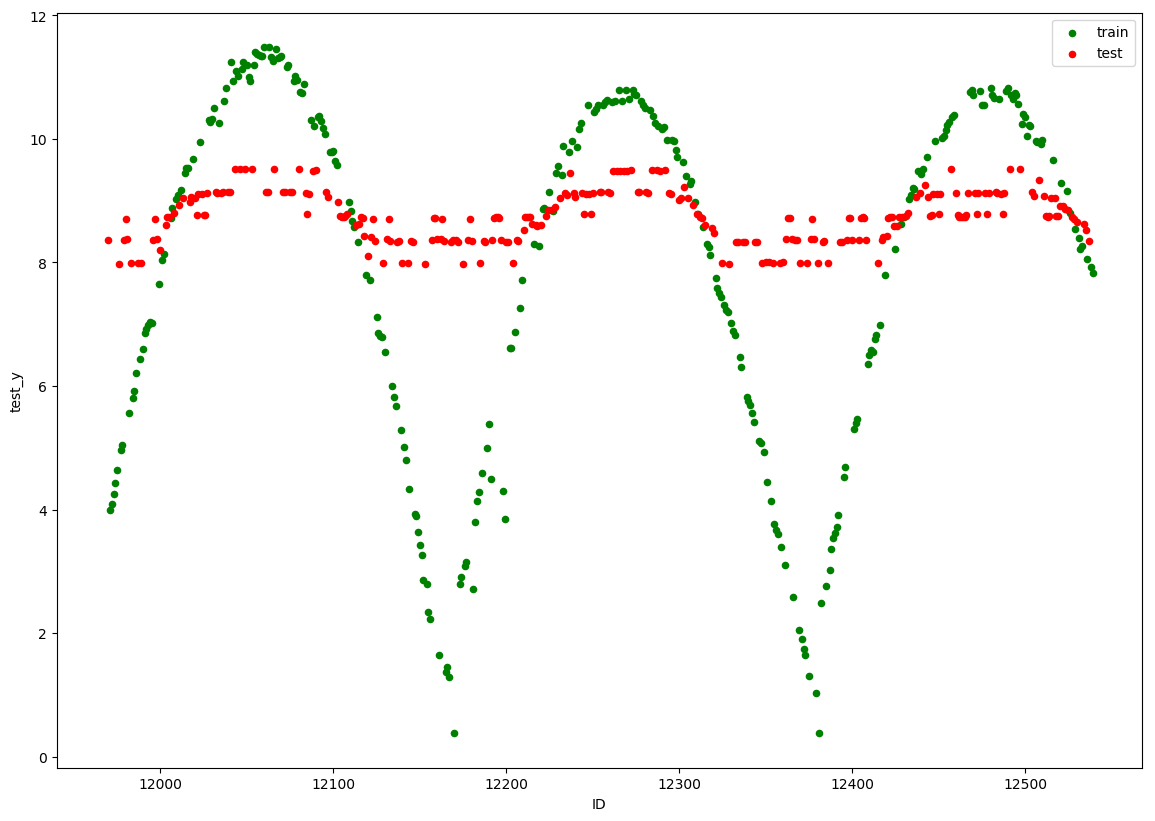

[8.355165498306583, 7.968970418246406, 8.355165498292694, 8.704729300575403, 8.373357614856054, 7.987286169656427, 7.987162647317507, 7.987165570314514, 8.357356963631249, 8.704996937439834, 8.378488288159813, 8.201399706763342, 8.610595479447271, 8.735338332525732, 8.742022518060606, 8.797270304682137, 8.935638838457674, 9.040581638159873, 8.9710585287539, 9.056291090462139, 9.045976967523327, 8.774953399399417, 9.109465646447811, 9.109363654448373, 8.759923233343256, 8.760015270429527, 9.123123471012514, 9.142830369197064, 9.127780844325322, 9.127802703130765, 9.145994819696595, 9.146118229500683, 9.14611834202197, 9.513874373403212, 9.513874485938388, 9.5139977832073, 9.514121193011386, 9.146241864361231, 9.146241751839943, 9.51412119298361, 9.146241751812168, 9.146118342035857, 9.14611834202197, 9.146241639290881, 9.514121080448435, 9.127926000416034, 8.778239013371813, 9.109610474062475, 9.477366486087082, 9.492642397359829, 9.132834204782306, 9.057460211912295, 8.972358475099346,

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

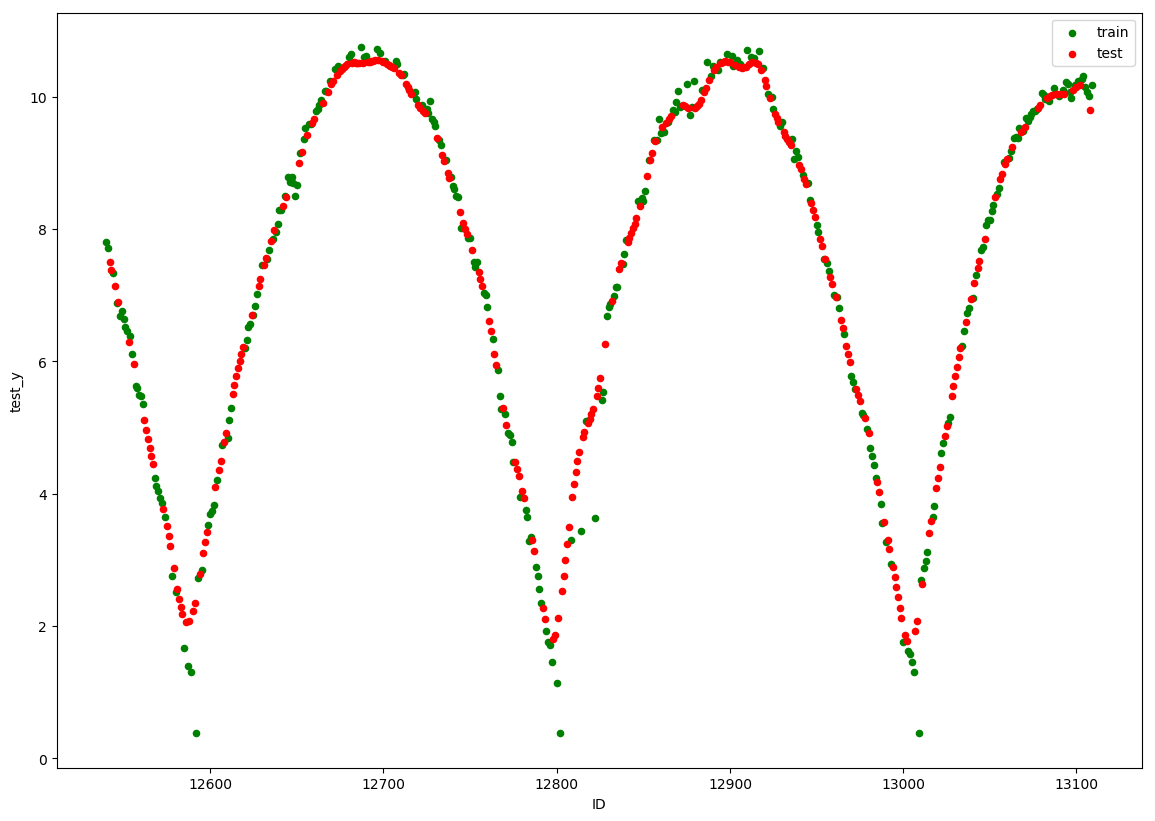

[7.504560836782891, 7.386151888741022, 7.138278496979124, 6.90125928586865, 6.297890720735367, 5.95790547579219, 5.111984437340963, 4.96830236279842, 4.829000508505734, 4.695358970237946, 4.568084392225883, 4.44720230085363, 3.771110136082518, 3.5074589392961424, 3.3608613140371038, 3.205257974890639, 2.877374157889948, 2.55583190479957, 2.4110217818008914, 2.2846083470809475, 2.182005722338195, 2.0654559272182924, 2.082486619757052, 2.229166209164317, 2.3431196488160326, 2.7849786564400336, 3.10844622690038, 3.2660010952344782, 3.41768761082208, 4.095603308992947, 4.358402080278804, 4.49446037434957, 4.77828876458962, 4.925075683204449, 5.509779455429575, 5.6457613319113324, 5.774436304707428, 5.89508492254162, 6.007737272716748, 6.113199539193444, 6.212973480975715, 6.69875811663365, 7.137104108634725, 7.247899661608279, 7.459017240966497, 7.5572107710405225, 7.822069190732672, 7.981493453810114, 8.34963940660695, 8.483552512772208, 8.994435500366238, 9.170205528332415, 9.41754870855

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

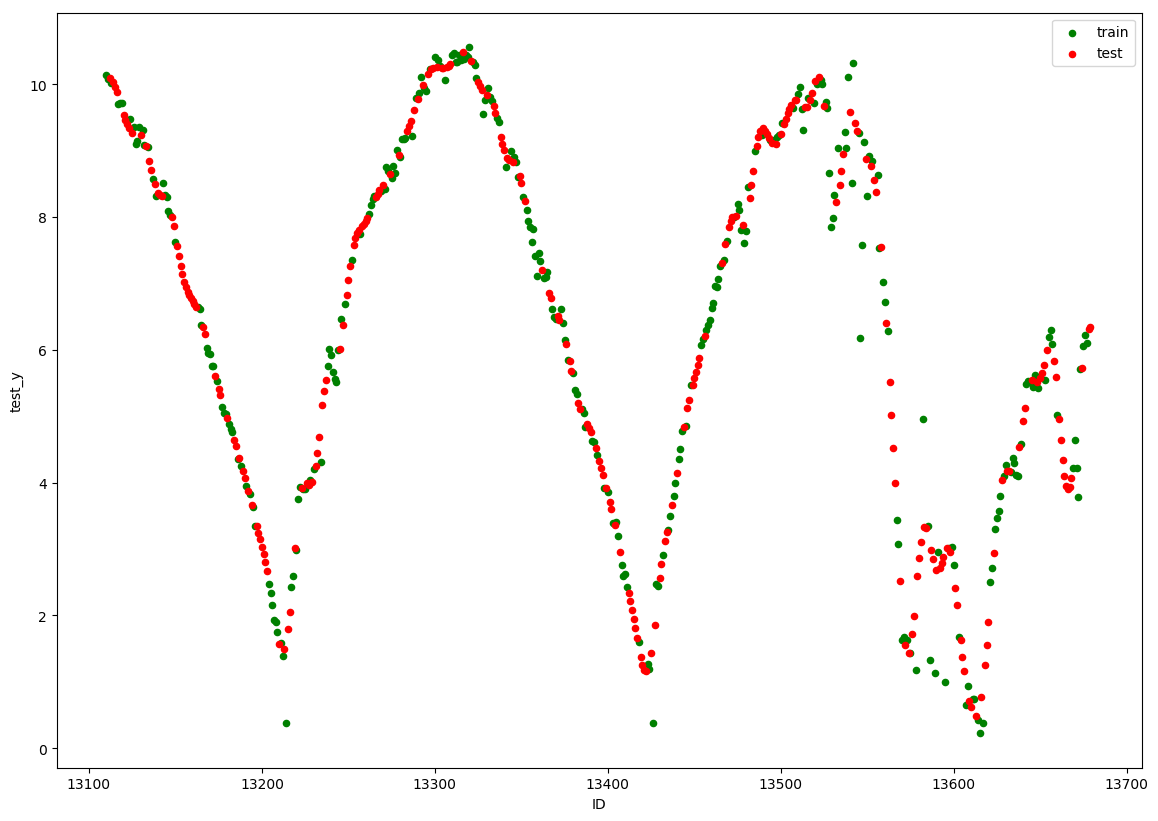

[10.10335443769138, 10.030429067724299, 9.962400370756505, 9.882681400630572, 9.54037202553671, 9.464463233519247, 9.397613570486321, 9.342383521605944, 9.273877892957536, 9.24059867960796, 9.065507921077707, 8.839730794667611, 8.714524018879448, 8.492659303856996, 8.358369290295325, 8.326837916971837, 8.311236541237836, 8.005535434199999, 7.871141239011926, 7.563290736619363, 7.40832765424108, 7.2640546269827615, 7.136580645861681, 7.02927137754415, 6.942620527389014, 6.8745337724378635, 6.820919730996416, 6.776457449721253, 6.735409682187491, 6.692369434411998, 6.642856397506339, 6.339118420146821, 6.238515972340265, 5.59987065284603, 5.410918173102503, 5.321662755741206, 4.98090379259942, 4.637955145041532, 4.549269115311051, 4.366291170469944, 4.174166942486982, 4.074505890800777, 3.8693774850908387, 3.6605049112958357, 3.3504346826747793, 3.2480437200152252, 3.1445665342720672, 3.0380475949973573, 2.925958504062581, 2.8054773982801264, 2.6739540250608482, 1.570152438356839, 1.4976

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

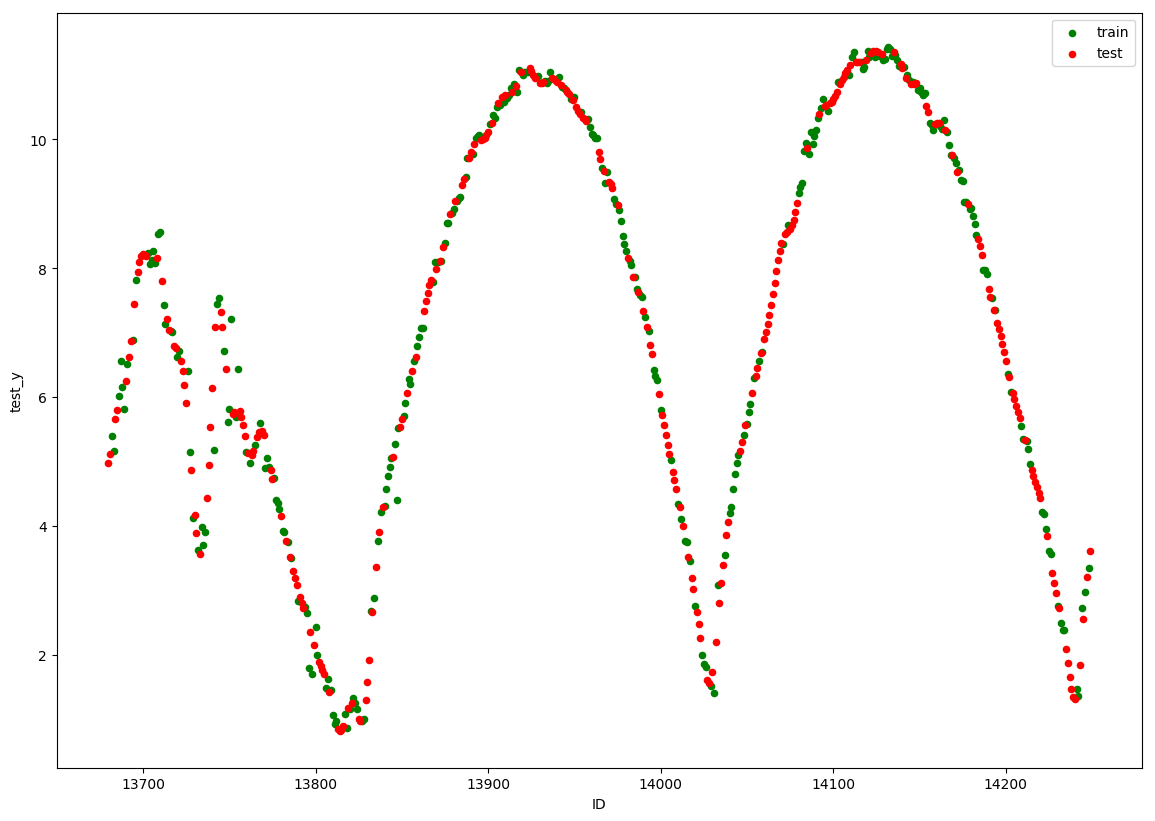

[4.983239834423822, 5.123579471097058, 5.657612946786779, 5.804311254815021, 6.255200504623653, 6.615528926836742, 6.871155649217082, 7.449783425714062, 7.938444386027614, 8.095100036860542, 8.185362227805742, 8.218722042712924, 8.213613233643189, 8.191829691117082, 8.155333326345762, 7.7957621871754625, 7.206564408762021, 7.045528775538793, 6.797902521619765, 6.766187392410189, 6.563270441038631, 6.404394511291449, 6.186943327460487, 5.913784447423021, 4.874148949174634, 4.1749169836261615, 3.8884572196688056, 3.563816232026583, 4.427732763968417, 4.954996200592879, 5.544024977129557, 6.137409755054028, 7.089641414796655, 7.326412269166281, 7.092367823112681, 6.4364189681022275, 5.743296741347375, 5.762083295167502, 5.787773702334181, 5.6988622154935555, 5.560754589543652, 5.398606430083961, 5.132593205738086, 5.096531648953905, 5.168101425898805, 5.379413719980458, 5.461104572638833, 5.477345274315487, 5.405407185430627, 4.8680910292381965, 4.73610492798047, 4.15405596070168, 3.77538

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

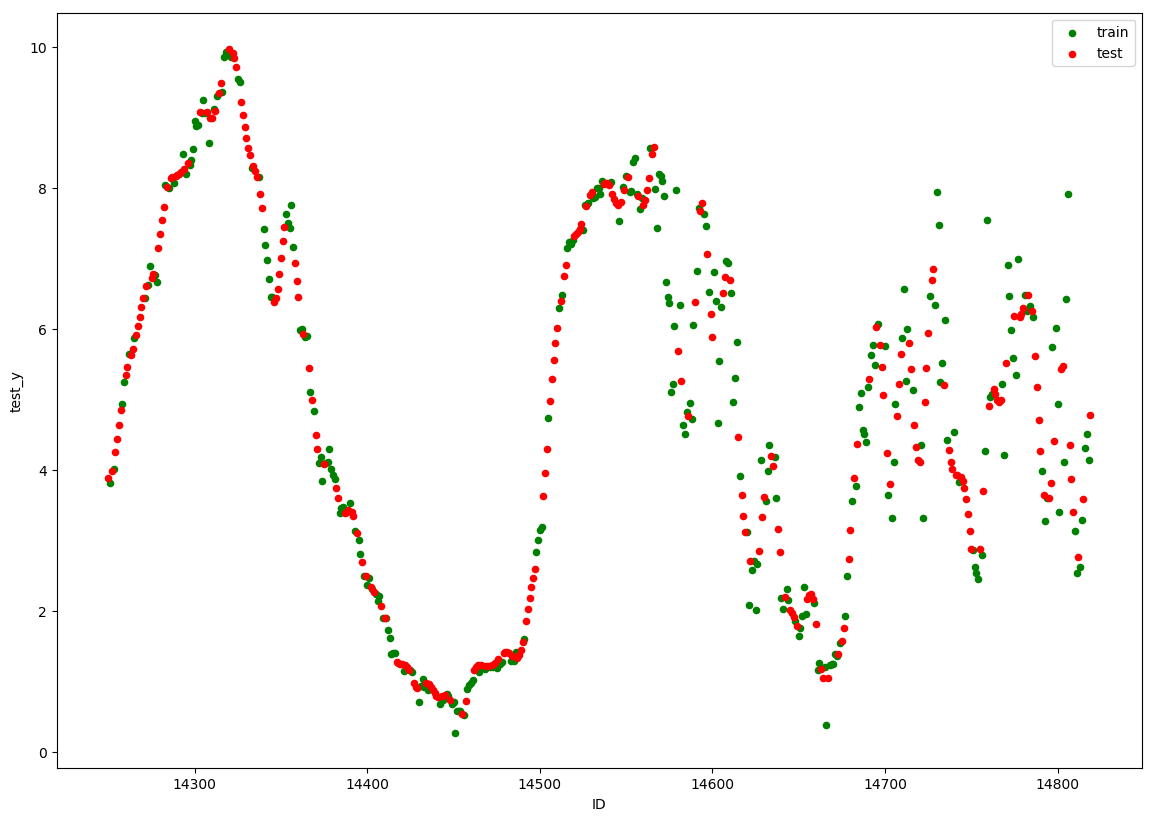

[3.8873617108925673, 3.9907706212132434, 4.260757001280504, 4.443741855807081, 4.643277860521386, 4.84522833529878, 5.345588406584582, 5.458631490621184, 5.629323601141676, 5.709384585215312, 5.909645797124452, 6.036425602239825, 6.174677456096221, 6.313120039961815, 6.438689902394916, 6.613271632075142, 6.723308724725916, 6.774597138983289, 7.1512812681174776, 7.34360519208181, 7.544732748264911, 7.734336741240451, 8.016187791365166, 8.140091124029318, 8.159892298949018, 8.174027748929628, 8.184683267974583, 8.201256624790245, 8.222349207512822, 8.272934665563026, 8.351545886774982, 9.083387233511708, 9.078685919174859, 8.993077356056716, 8.987833094719473, 9.097991314024288, 9.346126341366531, 9.49350830375563, 9.970175626140986, 9.920949116763158, 9.839502182655714, 9.723331512347679, 9.22567827179466, 9.040324499391758, 8.863306359324492, 8.704394801169252, 8.570248218485963, 8.462930251526462, 8.310050627045271, 8.242994257180298, 8.163006841930407, 7.910806529972504, 7.7234953745

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

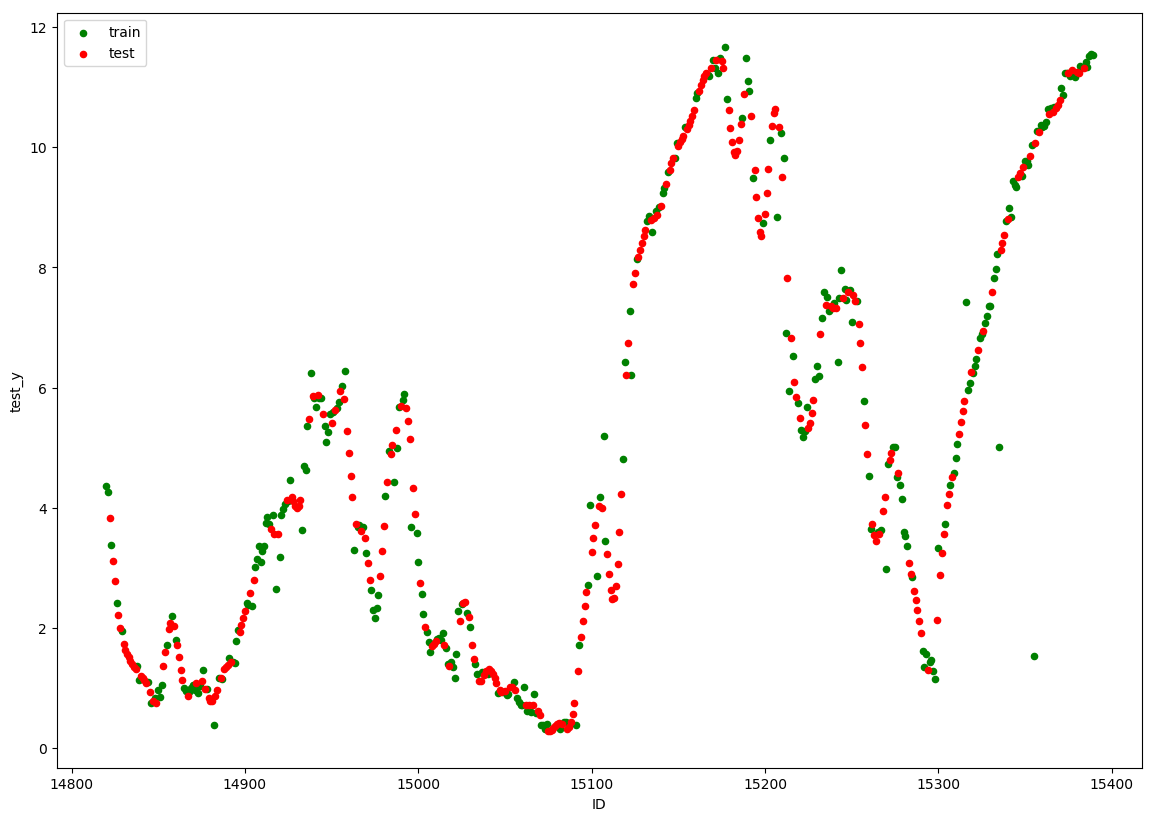

[3.833342826222621, 3.117814958139901, 2.777029314426362, 2.2126545860331706, 2.004636364430006, 1.726868107496228, 1.6390704106745861, 1.5708012648875678, 1.512768089226749, 1.4588674213930903, 1.4066046921124684, 1.3564594679565691, 1.310451245472255, 1.205376963099813, 1.1728587986487757, 1.1325658716097982, 1.079414313440692, 0.9328347221525943, 0.785066421675344, 0.7587514197897756, 1.3680264789140746, 1.6012479411586025, 1.9813221414902822, 2.0778736069344976, 2.02836635357796, 1.7136965924215337, 1.5097930419638486, 1.3085187353821945, 1.1315096102084627, 0.8641757515711532, 1.0884106219804552, 1.1149029919129747, 0.9879168068551625, 0.834495856420296, 0.7877550182519224, 0.7776694277622624, 0.8763744128593531, 0.9702123136745371, 1.1740671858609097, 1.3158503678398272, 1.3545004365752042, 1.3805046907318221, 1.4421478410293447, 1.9258536260612282, 2.0511579954848123, 2.1699844827196104, 2.2798345622090173, 2.5769651885864744, 2.7937736638899193, 3.654802616425659, 3.56448889811

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

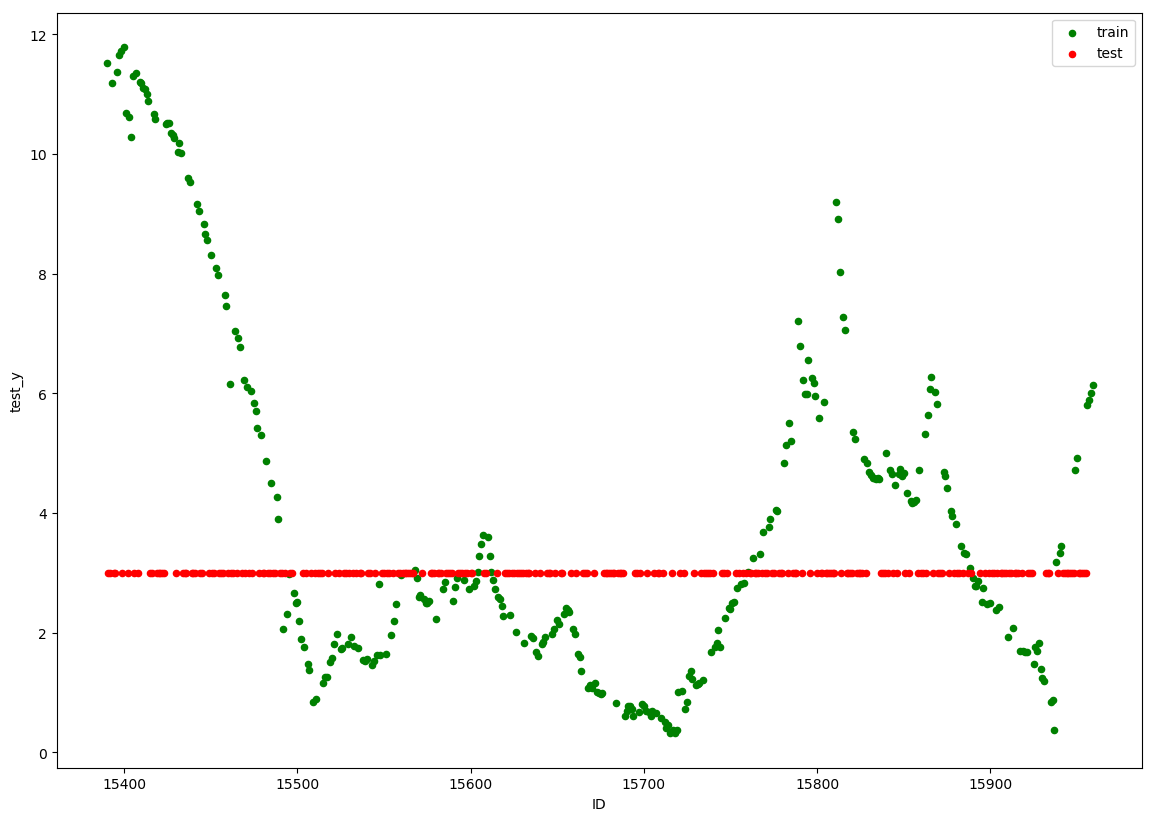

[2.9932014673193073, 2.9932014673193073, 2.9932014673193073, 2.9932014673193077, 2.99324686724907, 2.99324686724907, 2.99324686724907, 2.99324686724907, 2.9932014673193077, 2.9932014673193077, 2.9932014673193073, 2.993156067389545, 2.993156067389545, 2.993156067389545, 2.9932014673193073, 2.99324686724907, 2.9932014673193073, 2.993156067389545, 2.9932014673193073, 2.9932014673193073, 2.993156067389545, 2.9932014673193073, 2.9932014673193077, 2.9932014673193077, 2.99324686724907, 2.9932014673193073, 2.9932014673193077, 2.9932014673193073, 2.993156067389545, 2.9932014673193073, 2.99324686724907, 2.9932014673193073, 2.9932014673193073, 2.99324686724907, 2.99324686724907, 2.99324686724907, 2.99324686724907, 2.99324686724907, 2.99324686724907, 2.9932014673193073, 2.9932014673193073, 2.9932014673193073, 2.9932014673193073, 2.9932014673193073, 2.9932014673193077, 2.9931929238568253, 2.993118069943837, 2.9930916321713132, 2.993156067389545, 2.993145683222183, 2.993065502689857, 2.9930652675300

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

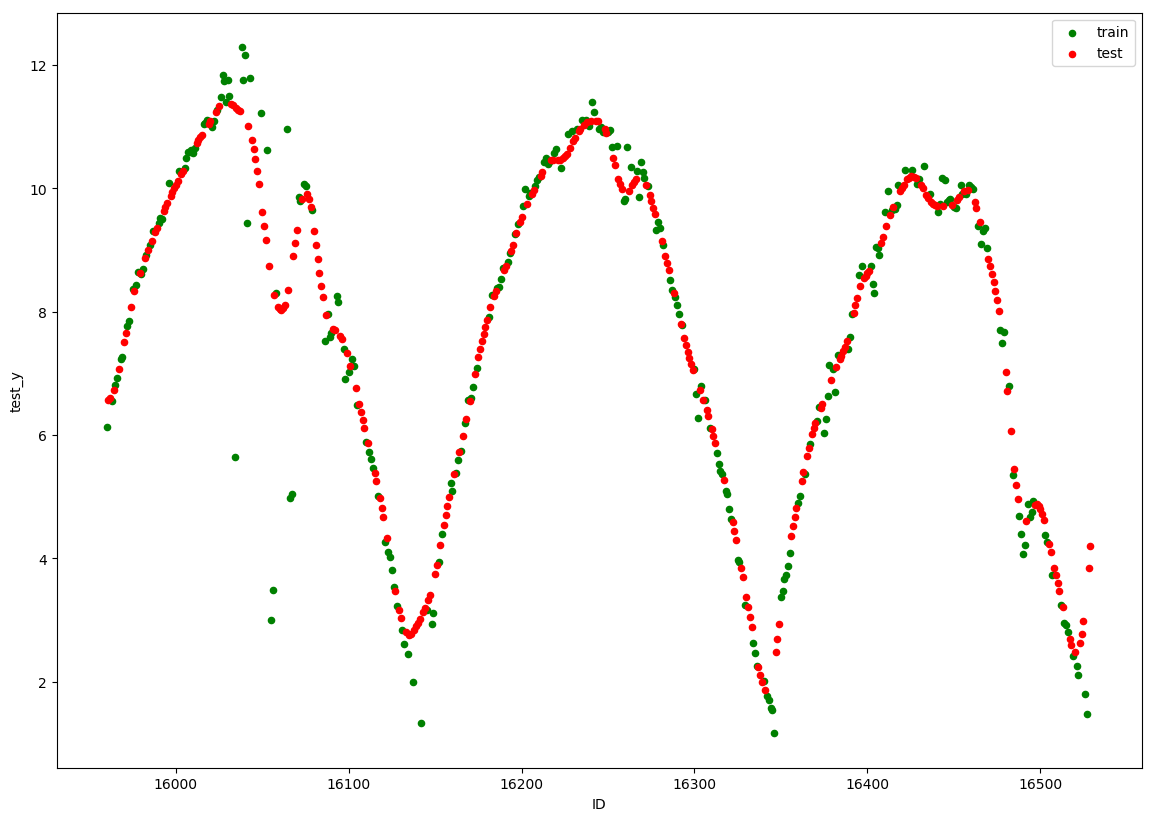

[6.571937510025011, 6.603901222715418, 6.734985864817032, 7.071051657306864, 7.503873329160431, 7.6542402889646315, 8.082556633659586, 8.329314479083983, 8.629217562175006, 8.866499060198544, 9.008806353173147, 9.14805858831231, 9.287085898442623, 9.35640823046617, 9.627852596080556, 9.69346975362712, 9.75799269828008, 9.88349321185041, 9.944363242326641, 10.003948205215515, 10.062286197170806, 10.11949169954387, 10.23140756969185, 10.286756026670055, 10.731446383917882, 10.781533984705588, 10.828590223396377, 10.872787224470795, 11.040760558342633, 11.086972812333714, 11.240628967534594, 11.337323120780672, 11.375332591431311, 11.349655867655773, 11.298423621364591, 11.274570759732024, 11.250629091173769, 11.00972842003088, 10.786691960579425, 10.639535346504184, 10.46953974299213, 10.279053497365394, 10.07157331046861, 9.623990576666491, 9.394452151229684, 9.168484332293806, 8.748546697693833, 8.265819057229212, 8.081074143776483, 8.036980693520357, 8.027428232787312, 8.0536754905008

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

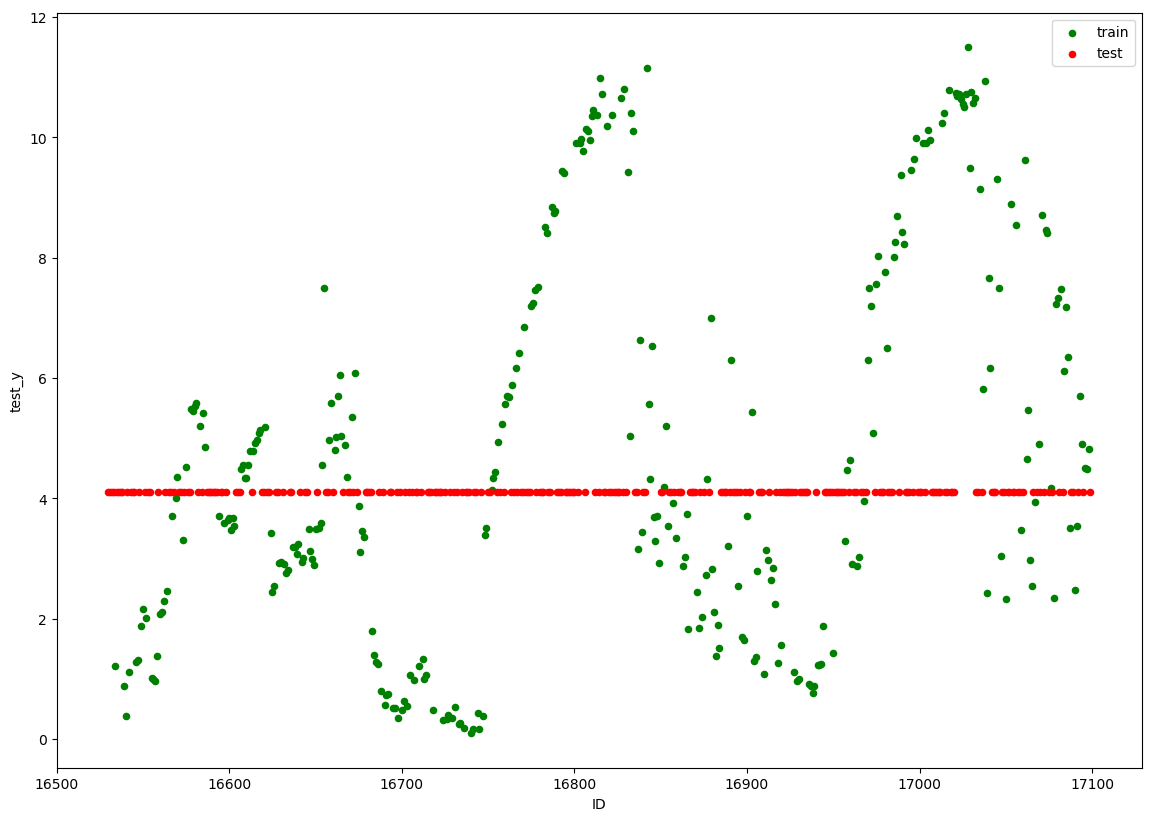

[4.1113816579458025, 4.1113816579458025, 4.1113816579458025, 4.11133625801604, 4.11133625801604, 4.1113816579458025, 4.1113816579458025, 4.11133625801604, 4.111290858086278, 4.11133625801604, 4.1113816579458025, 4.11133625801604, 4.111290858086278, 4.111290858086278, 4.11133625801604, 4.11133625801604, 4.111290858086278, 4.111290858086278, 4.11133625801604, 4.111367856044089, 4.11136733949211, 4.111387820024547, 4.111349512058152, 4.111363827138214, 4.111395973025864, 4.111427057875565, 4.111471802091811, 4.111471802091811, 4.111410891236176, 4.1113816579458025, 4.1113816579458025, 4.1113816579458025, 4.1113816579458025, 4.1113816579458025, 4.111367806597358, 4.111367806597358, 4.111362254330829, 4.111345080472214, 4.111360519478607, 4.1113816579458025, 4.111394012729072, 4.111434180273361, 4.1114235435289235, 4.111425794316777, 4.111425794316777, 4.1113549217315475, 4.11133625801604, 4.11133625801604, 4.111290858086278, 4.11133625801604, 4.1113443555138245, 4.111300945172577, 4.111336

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

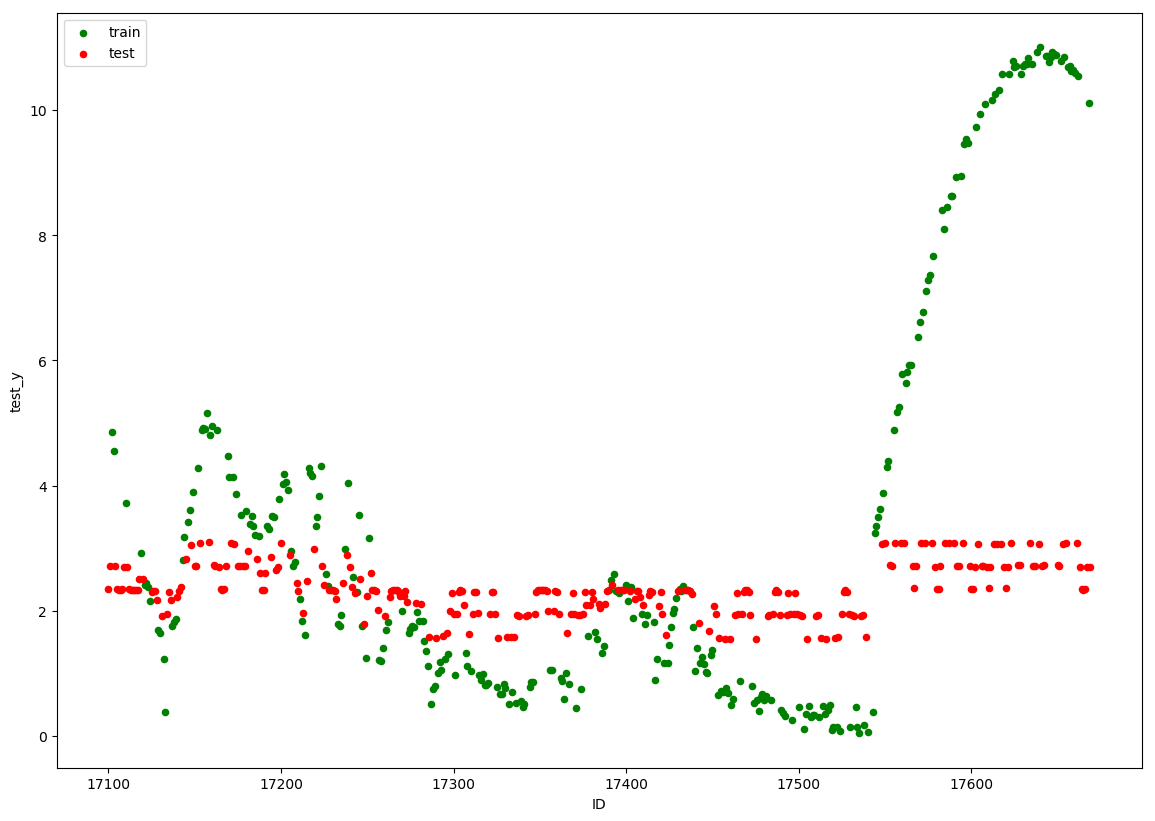

[2.3454567398595136, 2.7132127712268694, 2.7132127712268694, 2.3454567398734016, 2.327141326041129, 2.3271412135198424, 2.345333330069315, 2.694897132338135, 2.694897132338135, 2.345333330055427, 2.32714110097078, 2.3270178037087934, 2.327017747301654, 2.327079235396393, 2.3361516647213234, 2.510478457101915, 2.5109431669675564, 2.2994808148022248, 2.3256006746531352, 2.320153253886324, 2.1826145323990738, 1.9162238184386162, 1.9476493200326377, 2.301094258729546, 2.173223888032933, 2.217574616298571, 2.3241148955402595, 2.3866007507060494, 2.833021596387181, 3.0488856100060193, 2.713327802852174, 2.7133363983162986, 3.081215847272748, 3.0995313736401955, 2.7315285226646666, 2.7133361810448444, 2.694897244901086, 2.345333442618378, 2.3272646233100414, 2.3454568524085766, 2.7132128837759324, 3.0812156222023988, 3.0629002083840136, 2.7133361810587324, 2.7132129962972193, 2.7132129626083814, 2.7132993001008345, 2.964597573333684, 2.8321390599200957, 2.607880967359309, 2.3410849790696555, 

In [10]:
#划分bin，周期为190
y_predict=[]
prd=570
n_prd=df.shape[0]/prd
n_prd
n=int(n_prd)+1
for i in range(n):
    x_train_df = df.loc[(df['ID'] >= i*prd) & (df['ID']< (i+1)*prd) & (df['is_train']==1)]
    x_train=x_train_df[['ID']]
    y_train=x_train_df[['y']]
    
    #Fit regression model

    svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
    
    x_test_df = df.loc[(df['ID'] >= i*prd) & (df['ID']< (i+1)*prd) & (df['is_train']==0)]
    

    svr.fit(x_train, y_train)
    

    x_test=x_test_df[['ID']]
    y_svr = svr.predict(x_test)
  
    
    
    
    svr_test=pd.DataFrame()
    svr_train=pd.DataFrame()

    svr_test['ID']=x_test['ID']
    svr_test['test_y']=y_svr


    svr_train['ID']=x_train['ID']
    svr_train['train_y']=y_train['y']

    svr_total = pd.concat([svr_train, svr_test],sort=False)
    svr_total.sort_values(by=['ID'],ascending=True, inplace=True)



    figure(num=None, figsize=(14, 10), dpi=100, facecolor='w', edgecolor='k')

    ax = plt.gca()

    svr_total.plot.scatter(x='ID',y='train_y',color='green',label='train',ax=ax)
    svr_total.plot.scatter(x='ID',y='test_y',color='red',label='test',ax=ax)

    plt.show()
    
    y_pre_list = y_svr.tolist()
    print(y_pre_list)
    y_pre_list += y_pre_list




    

    
    

In [12]:
len(y_pre_list)

572

In [ ]:
test = df[df['is_train']==0]

In [20]:
test['ans'] = np.mean(test_predicts, axis=0)

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
#rolling时泄漏，因此线下达到0.86375，但是线上成绩只有0.7606
test[['ID','ans']].to_csv('../result/080302_08599.csv',header=False, index=False)